# **Python Project – Final Assignment**
___


# List of Packages

In [ ]:
# List of packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from tabulate import tabulate
import plotly.graph_objects as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Exploration Among Excel Sheets

## Data Exploration / Cleaning - Excel Sheet 'Company'

In [ ]:
Company = pd.read_excel('/content/drive/MyDrive/2324MBD41_Project_Dataset-v01.xlsx', sheet_name = 'COMPANY')
Company.describe() # To have a first glance of that sheet

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER
count,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,977,255,428,269,6,9,10
top,Twitter,"Biotechnology, Health Care, Medical, Pharmaceu...","San Francisco, California, United States",2012,—,—,$1M to $10M,101-250
freq,1,5,173,55,678,995,230,196


### Category

In [ ]:
# Taking the 1st element of Category in order to then classify the different companies
Company['INDUSTRY_DESC'] = Company['CATEGORY'].apply(lambda x: x.split(',')[0])
Company.head()

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER,INDUSTRY_DESC
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media","San Francisco, California, United States","Mar 21, 2006","Nov 7, 2013",—,$1B to $10B,1001-5000,Blogging Platforms
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...","Hangzhou, Zhejiang, China",Oct 2014,—,—,$100M to $500M,5001-10000,Banking
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...","New York, New York, United States",2016,—,—,$1M to $10M,51-100,Consumer
3,Xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China","Apr 4, 2010","Jul 9, 2018",—,$10B+,10001+,Consumer Electronics
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...","Brooklyn, New York, United States",2018,—,—,$1M to $10M,1-10,Consumer Goods


In [ ]:
Company["INDUSTRY_DESC"].value_counts()/len(Company)*100

Analytics                                         6.7
Artificial Intelligence                           6.0
E-Commerce                                        5.4
Apps                                              4.6
Finance                                           3.3
                                                 ... 
Coffee                                            0.1
eSports                                           0.1
Property Management                               0.1
Art                                               0.1
Application Specific Integrated Circuit (ASIC)    0.1
Name: INDUSTRY_DESC, Length: 192, dtype: float64

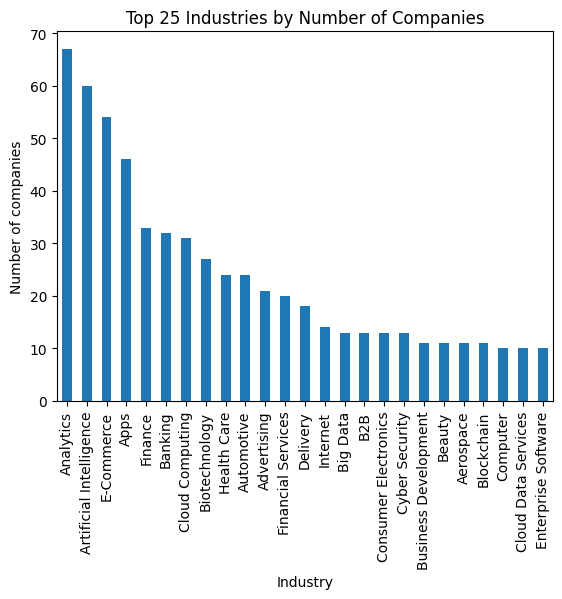

In [ ]:
# Having a first idea of how the categories/industries are distributed among the data
industry_count = Company['INDUSTRY_DESC'].value_counts().head(25)

# Plotting the bar chart
industry_count.plot(kind='bar')

plt.xlabel('Industry')
plt.ylabel('Number of companies')
plt.title('Top 25 Industries by Number of Companies')

plt.show()

### Location

In [ ]:
# Observing how is composed the 'Location' column
Company[["LOCATION"]].value_counts()
Company

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER,INDUSTRY_DESC
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media","San Francisco, California, United States","Mar 21, 2006","Nov 7, 2013",—,$1B to $10B,1001-5000,Blogging Platforms
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...","Hangzhou, Zhejiang, China",Oct 2014,—,—,$100M to $500M,5001-10000,Banking
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...","New York, New York, United States",2016,—,—,$1M to $10M,51-100,Consumer
3,Xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China","Apr 4, 2010","Jul 9, 2018",—,$10B+,10001+,Consumer Electronics
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...","Brooklyn, New York, United States",2018,—,—,$1M to $10M,1-10,Consumer Goods
...,...,...,...,...,...,...,...,...,...
995,Valiu,"Cryptocurrency, Finance, Financial Services, F...","Bogotá, Distrito Especial, Colombia","Sep 17, 2018",—,—,$1M to $10M,11-50,Cryptocurrency
996,Airship,"Analytics, Information Technology, Messaging, ...","Portland, Oregon, United States","Jun 1, 2009",—,—,$50M to $100M,251-500,Analytics
997,Jupiter,"Delivery, Logistics","San Francisco, California, United States",2019,—,—,Less than $1M,1-10,Delivery
998,Bank of America,"Asset Management, Banking, Finance, Financial ...","Charlotte, North Carolina, United States","Jul 31, 1998","Jan 13, 1978",—,$10B+,10001+,Asset Management


In [ ]:
# Splitting in 3 different columns the informations we can find in 'Location'
location_split = Company['LOCATION'].str.split(', ', n=2, expand=True)
Company['CITY'] = location_split[0]
Company['REGION'] = location_split[1]
Company['COUNTRY'] = location_split[2]
Company.head()

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER,INDUSTRY_DESC,CITY,REGION,COUNTRY
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media","San Francisco, California, United States","Mar 21, 2006","Nov 7, 2013",—,$1B to $10B,1001-5000,Blogging Platforms,San Francisco,California,United States
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...","Hangzhou, Zhejiang, China",Oct 2014,—,—,$100M to $500M,5001-10000,Banking,Hangzhou,Zhejiang,China
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...","New York, New York, United States",2016,—,—,$1M to $10M,51-100,Consumer,New York,New York,United States
3,Xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China","Apr 4, 2010","Jul 9, 2018",—,$10B+,10001+,Consumer Electronics,Beijing,Beijing,China
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...","Brooklyn, New York, United States",2018,—,—,$1M to $10M,1-10,Consumer Goods,Brooklyn,New York,United States


In [ ]:
Company.describe()

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER,INDUSTRY_DESC,CITY,REGION,COUNTRY
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,977,255,428,269,6,9,10,192,252,115,46
top,Twitter,"Biotechnology, Health Care, Medical, Pharmaceu...","San Francisco, California, United States",2012,—,—,$1M to $10M,101-250,Analytics,San Francisco,California,United States
freq,1,5,173,55,678,995,230,196,67,173,347,660


In [ ]:
# Observing how the cities are distributed and which ones are coming out the most frequently
Company['CITY'].value_counts()/len(Company)*100

San Francisco    17.3
New York         11.1
London            5.8
Boston            2.5
Mountain View     2.2
                 ... 
Milan             0.1
Hong Kong         0.1
Providence        0.1
Lehi              0.1
Portland          0.1
Name: CITY, Length: 252, dtype: float64

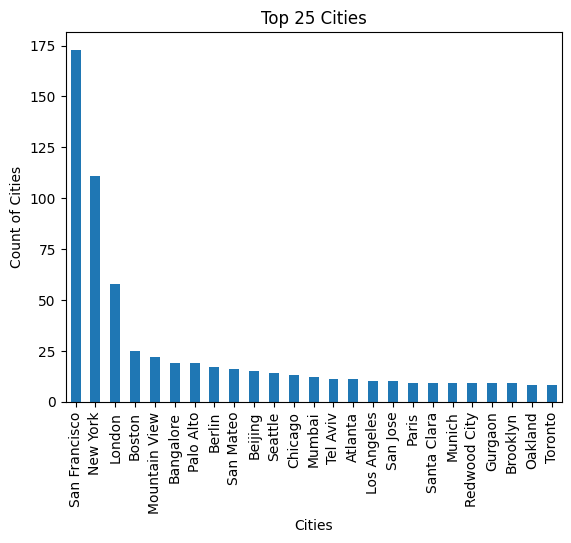

In [ ]:
# Observing the frequency distribution of cities among our data
city_count = Company['CITY'].value_counts().head(25)

# Plotting the bar chart
city_count.plot(kind='bar')

plt.xlabel('Cities')
plt.ylabel('Count of Cities')
plt.title('Top 25 Cities')

plt.show()

### Founded On / Exited On / Closed On

In [ ]:
# We convert FOUNDED_ON EXITED_ON and CLOSED_ON as datetime type values and set "—" into NaT values.
Company['FOUNDED_ON'] = pd.to_datetime(Company['FOUNDED_ON'], errors='coerce')
Company['EXITED_ON'] = pd.to_datetime(Company['EXITED_ON'], errors='coerce')
Company['CLOSED_ON'] = pd.to_datetime(Company['CLOSED_ON'], errors='coerce')
Company.head()

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER,INDUSTRY_DESC,CITY,REGION,COUNTRY
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media","San Francisco, California, United States",2006-03-21,2013-11-07,NaT,$1B to $10B,1001-5000,Blogging Platforms,San Francisco,California,United States
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...","Hangzhou, Zhejiang, China",2014-10-01,NaT,NaT,$100M to $500M,5001-10000,Banking,Hangzhou,Zhejiang,China
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...","New York, New York, United States",2016-01-01,NaT,NaT,$1M to $10M,51-100,Consumer,New York,New York,United States
3,Xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China",2010-04-04,2018-07-09,NaT,$10B+,10001+,Consumer Electronics,Beijing,Beijing,China
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...","Brooklyn, New York, United States",2018-01-01,NaT,NaT,$1M to $10M,1-10,Consumer Goods,Brooklyn,New York,United States


In [ ]:
# Having the months or days is not so relevant, thus we want to keep only the years that are the 4 first elements of our strings
Company['FOUNDED_ON'] = Company['FOUNDED_ON'].astype(str).str[:4]
Company['EXITED_ON'] = Company['EXITED_ON'].astype(str).str[:4]
Company['CLOSED_ON'] = Company['CLOSED_ON'].astype(str).str[:4]
Company

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER,INDUSTRY_DESC,CITY,REGION,COUNTRY
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media","San Francisco, California, United States",2006,2013,NaT,$1B to $10B,1001-5000,Blogging Platforms,San Francisco,California,United States
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...","Hangzhou, Zhejiang, China",2014,NaT,NaT,$100M to $500M,5001-10000,Banking,Hangzhou,Zhejiang,China
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...","New York, New York, United States",2016,NaT,NaT,$1M to $10M,51-100,Consumer,New York,New York,United States
3,Xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China",2010,2018,NaT,$10B+,10001+,Consumer Electronics,Beijing,Beijing,China
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...","Brooklyn, New York, United States",2018,NaT,NaT,$1M to $10M,1-10,Consumer Goods,Brooklyn,New York,United States
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Valiu,"Cryptocurrency, Finance, Financial Services, F...","Bogotá, Distrito Especial, Colombia",2018,NaT,NaT,$1M to $10M,11-50,Cryptocurrency,Bogotá,Distrito Especial,Colombia
996,Airship,"Analytics, Information Technology, Messaging, ...","Portland, Oregon, United States",2009,NaT,NaT,$50M to $100M,251-500,Analytics,Portland,Oregon,United States
997,Jupiter,"Delivery, Logistics","San Francisco, California, United States",2019,NaT,NaT,Less than $1M,1-10,Delivery,San Francisco,California,United States
998,Bank of America,"Asset Management, Banking, Finance, Financial ...","Charlotte, North Carolina, United States",1998,1978,NaT,$10B+,10001+,Asset Management,Charlotte,North Carolina,United States


In [ ]:
# Observing the frequency of years in 'Founded On'
Company['FOUNDED_ON'].value_counts()/len(Company)*100

2015    10.7
2012     9.3
2014     8.5
2013     7.8
2016     6.7
        ... 
1979     0.1
1841     0.1
1890     0.1
1958     0.1
1975     0.1
Name: FOUNDED_ON, Length: 86, dtype: float64

In [ ]:
Company['FOUNDED_ON'] = pd.to_numeric(Company['FOUNDED_ON'], errors='coerce')
result = sum(Company[Company['FOUNDED_ON'] >= 2005]['FOUNDED_ON']) / sum(Company['FOUNDED_ON'])
result

0.8227204255730651

We can see that 82.27% of the companies were founded after 2005.

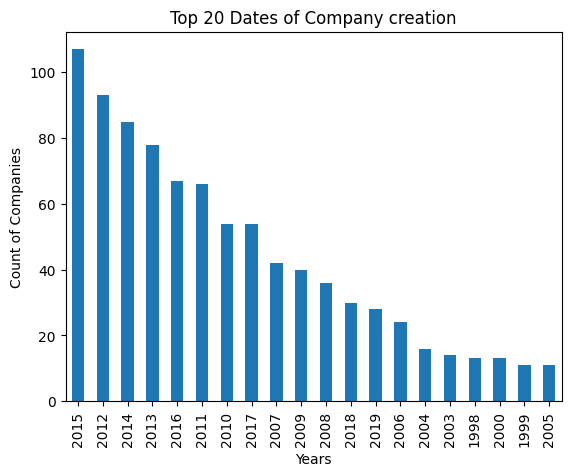

In [ ]:
# Observing the distribution of company dates creation after 2005 since we got most of the data starting from there
dates_founded_count = Company['FOUNDED_ON'].value_counts().head(20)

# Plotting the bar chart
dates_founded_count.plot(kind='bar')

plt.xlabel('Years')
plt.ylabel('Count of Companies')
plt.title('Top 20 Dates of Company creation')

plt.show()

In [ ]:
# Preparing the frequency for 'Exited On'
Company['EXITED_ON'].value_counts()/len(Company)*100

NaT     67.8
2020     8.6
2018     3.4
2019     2.3
2017     2.0
2015     1.9
2014     1.6
2016     1.5
1999     1.1
2012     0.9
2011     0.8
2013     0.7
2000     0.7
1978     0.7
2004     0.5
2002     0.5
1986     0.5
2006     0.4
1998     0.4
2010     0.4
1995     0.4
2007     0.4
1996     0.3
2003     0.3
1989     0.2
1992     0.2
1981     0.2
1980     0.2
1990     0.1
1928     0.1
1971     0.1
2008     0.1
1991     0.1
2001     0.1
2009     0.1
1987     0.1
1993     0.1
1988     0.1
1997     0.1
Name: EXITED_ON, dtype: float64

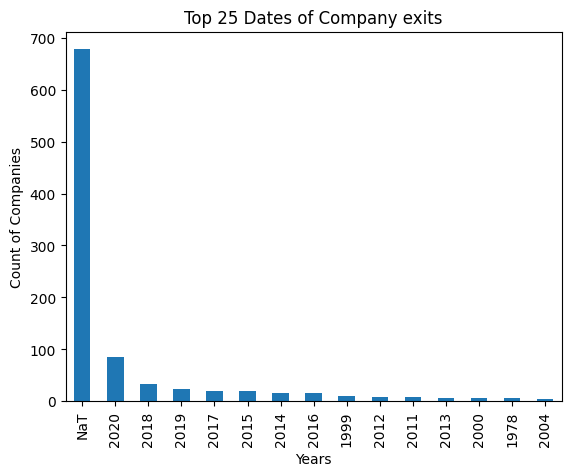

In [ ]:
# Displaying the frequency of 'Exited On'
dates_exited_count = Company['EXITED_ON'].value_counts().head(15)

# Plotting the bar chart
dates_exited_count.plot(kind='bar')

plt.xlabel('Years')
plt.ylabel('Count of Companies')
plt.title('Top 25 Dates of Company exits')

plt.show()

In [ ]:
exited_on_count = (Company['EXITED_ON'] != 'NaT').sum()
exited_on_count

322

We got 322 companies that made an exit.

In [ ]:
# Checking the distribution for 'Closed On'
Company['CLOSED_ON'].value_counts()/len(Company)*100

NaT     99.5
2020     0.4
2014     0.1
Name: CLOSED_ON, dtype: float64

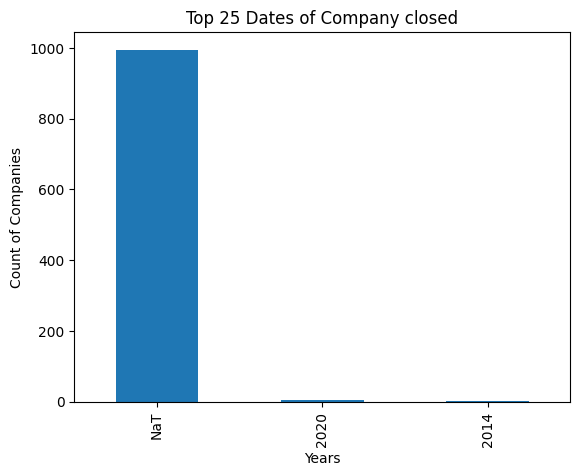

In [ ]:
# Displaying the frequency for 'Closed On'
dates_closed_count = Company['CLOSED_ON'].value_counts().head(20)

# Plotting the bar chart
dates_closed_count.plot(kind='bar')

plt.xlabel('Years')
plt.ylabel('Count of Companies')
plt.title('Top 25 Dates of Company closed')

plt.show()

In [ ]:
# Searching for how many companies have Closed
closed_on_count = (Company['CLOSED_ON'] != 'NaT').sum()
closed_on_count
# 5 Companies closed among 1000

5

In [ ]:
# Counting the number of companies closed in 2020
closed_2020_count = len(Company[Company['CLOSED_ON'].str.strip() == '2020'])

# Counting the number of companies closed in 2014
closed_2014_count = len(Company[Company['CLOSED_ON'].str.strip() == '2014'])

print(f"Number of companies closed in 2020: {closed_2020_count}")
print(f"Number of companies closed in 2014: {closed_2014_count}")

Number of companies closed in 2020: 4
Number of companies closed in 2014: 1


### Revenue range / Number of employees

In [ ]:
# Displaying the frequency for 'Revenue Range'
Company['REVENU_RANGE'].value_counts()/len(Company)*100

$1M to $10M       23.0
$10M to $50M      21.6
$100M to $500M    16.6
$50M to $100M     10.3
$1B to $10B        7.7
Less than $1M      7.3
$500M to $1B       4.7
—                  4.6
$10B+              4.2
Name: REVENU_RANGE, dtype: float64

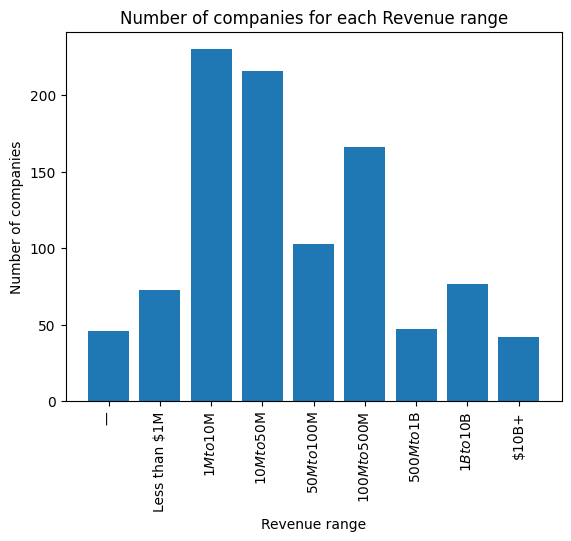

In [ ]:
# Based on frequency of 'Revenue Range' of above, we can create a list of the different revenue rangees
revenue_ranges = ["—", "Less than $1M", "$1M to $10M", "$10M to $50M", "$50M to $100M", "$100M to $500M", "$500M to $1B", "$1B to $10B", "$10B+"]

# Group by 'REVENU_RANGE' and count the occurrences
revenue_counts = Company['REVENU_RANGE'].value_counts().reindex(revenue_ranges, fill_value=0).reset_index()

# Rename columns
revenue_counts.columns = ['REVENU_RANGE', 'count']

# Plot the bar chart
plt.bar(revenue_counts['REVENU_RANGE'].astype(str), revenue_counts['count'])
plt.xlabel('Revenue range')
plt.ylabel('Number of companies')
plt.title('Number of companies for each Revenue range')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Checking how many data within each ranges
revenue_counts

,REVENU_RANGE,count
0,—,46
1,Less than $1M,73
2,$1M to $10M,230
3,$10M to $50M,216
4,$50M to $100M,103
5,$100M to $500M,166
6,$500M to $1B,47
7,$1B to $10B,77
8,$10B+,42


In [ ]:
# Calculating the % of informations within the ranges that have the most 'n' from our population
Revenu = Company.groupby('REVENU_RANGE')['REVENU_RANGE'].count().reset_index(name='count').reset_index(drop=True)

# Creating 3 different percentages to analyze the data from the previous table
percentage_1 = sum(Revenu[Revenu['REVENU_RANGE'].isin(["$10M to $50M", "$1M to $10M", "Less than $1M"])]["count"]) / sum(Revenu["count"]) * 100
percentage_2 = sum(Revenu[Revenu['REVENU_RANGE'].isin(["$10B+", "$1B to $10B", "$500M to $1B", "$100M to $500M", "$50M to $100M"])]["count"]) / sum(Revenu["count"]) * 100
percentage_3 = sum(Revenu[Revenu['REVENU_RANGE'].isin(["—"])]["count"]) / sum(Revenu["count"]) * 100

# Add context to the results
print(f"Percentage of companies with revenue between $1M and $50M: {percentage_1:.2f}%")
print(f"Percentage of companies with revenue over $50M: {percentage_2:.2f}%")
print(f"Percentage of companies with unspecified revenue: {percentage_3:.2f}%")

Percentage of companies with revenue between $1M and $50M: 51.90%
Percentage of companies with revenue over $50M: 43.50%
Percentage of companies with unspecified revenue: 4.60%


In [ ]:
# Define the predefined employee number ranges
employee_number_ranges = ["1-10", "11-50", "51-100", "101-250", "251-500", "501-1000", "1001-5000", "5001-10000", "10001+", "—"]

# Group by 'EMPLOYEE_NUMBER' and count the occurrences
Employee = Company['EMPLOYEE_NUMBER'].value_counts().reindex(employee_number_ranges, fill_value=0).reset_index()

# Rename columns
Employee.columns = ['EMPLOYEE_NUMBER', 'count']
Employee

,EMPLOYEE_NUMBER,count
0,1-10,25
1,11-50,124
2,51-100,95
3,101-250,196
4,251-500,156
5,501-1000,119
6,1001-5000,155
7,5001-10000,33
8,10001+,95
9,—,2


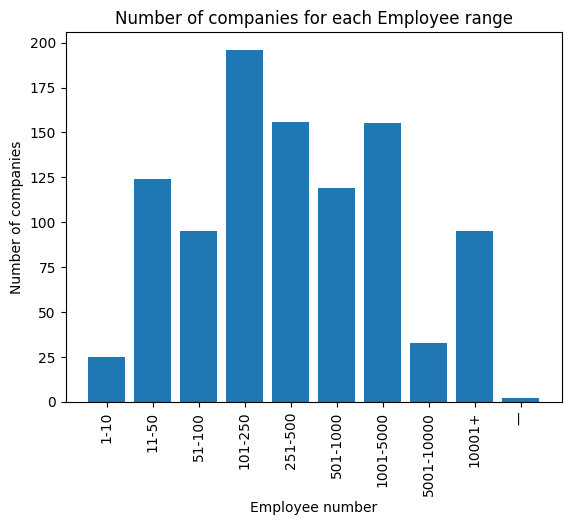

In [ ]:
# Creating a plot chart to observe the distribution of number of employees among the different companies of our data set
Employee_bis = pd.DataFrame({"EMPLOYEE_NUMBER": ["1-10","11-50","51-100","101-250","251-500","501-1000","1001-5000","5001-10000","10001+","—"]})

# Merging the data
Employee = pd.merge(Employee_bis, Employee, on="EMPLOYEE_NUMBER", how="inner")

# Creating the chart
plt.bar(Employee['EMPLOYEE_NUMBER'].astype(str), Employee['count'])
plt.xlabel('Employee number')
plt.ylabel('Number of companies')
plt.title('Number of companies for each Employee range')
plt.xticks(rotation=90)
plt.show()

In [ ]:
def calculate_and_print_percentage(data, categories, text):
    percentage = sum(data[data['EMPLOYEE_NUMBER'].isin(categories)]["count"]) / sum(data["count"]) * 100
    print(f"{text}: {percentage:.2f}%")

# Add context to the calculations
employee_categories_1 = ["1-10", "11-50", "51-100", "101-250"]
employee_categories_2 = ["251-500", "501-1000", "1001-5000"]
employee_categories_3 = ["5001-10000", "10001+", "—"]

calculate_and_print_percentage(Employee, employee_categories_1, "Percentage of companies with 1-250 employees:")
calculate_and_print_percentage(Employee, employee_categories_2, "Percentage of companies with 251-5000 employees:")
calculate_and_print_percentage(Employee, employee_categories_3, "Percentage of companies with over 5000 employees:")
calculate_and_print_percentage(Employee, ["—"], "Percentage of companies with unspecified employee numbers:")

Percentage of companies with 1-250 employees:: 44.00%
Percentage of companies with 251-5000 employees:: 43.00%
Percentage of companies with over 5000 employees:: 13.00%
Percentage of companies with unspecified employee numbers:: 0.20%


## Data Exploration / Cleaning - Excel Sheet 'Investment'

In [ ]:
Investment = pd.read_excel('/content/drive/MyDrive/2324MBD41_Project_Dataset-v01.xlsx', sheet_name = 'INVESTMENT')
Investment.describe() # To have a first glance of that sheet

,COMPANY_NAME,FUNDING_TYPE,MONEY_RAISED,ANNOUNCED_DATE,INVESTMENT_STAGE
count,5937,5937,5937,5937,5937
unique,935,28,1210,2331,5
top,Tesla,Series A,—,"Dec 8, 2020",—
freq,36,854,1028,25,1766


We have a couple of duplicates, taking the case of Twitter, there are several similar stages, thus we remove them and keep the most important ones.

In [ ]:
Investment = Investment.copy()

# Remove all duplicate rows
Investment = Investment.drop_duplicates()

# Create a new column 'Overall Information'
Investment["Overall Information"] = Investment["COMPANY_NAME"] + " - " + Investment["FUNDING_TYPE"] + " - " + Investment["ANNOUNCED_DATE"]

# Remove duplicates based on the new column, keeping the last occurrence
Investment = Investment.drop_duplicates(subset="Overall Information", keep="last").reset_index(drop=True)

# Drop the 'Overall Information' column
Investment = Investment.drop(columns="Overall Information")
Investment.describe()

,COMPANY_NAME,FUNDING_TYPE,MONEY_RAISED,ANNOUNCED_DATE,INVESTMENT_STAGE
count,4747,4747,4747,4747,4747
unique,935,28,1206,2331,5
top,SpaceX,Series A,—,"Dec 8, 2020",—
freq,31,659,846,25,1414


In [ ]:
# Checking now how the data is coming out of our dataframe
Investment

,COMPANY_NAME,FUNDING_TYPE,MONEY_RAISED,ANNOUNCED_DATE,INVESTMENT_STAGE
0,Pipe,Venture - Series Unknown,"$250,000,000","Mar 31, 2021",—
1,Pipe,Series A,"$50,000,000","Mar 9, 2021",Early Stage Venture
2,Pipe,Seed,"$6,000,000","Feb 25, 2020",Seed
3,Pipe,Seed,"$10,000,000","Jun 24, 2020",Seed
4,Epic Games,Seed,"$1,000,000,000","Apr 13, 2021",Seed
...,...,...,...,...,...
4742,PTC,Post-IPO Equity,"$1,000,000,000","Jun 11, 2018",—
4743,Berkshire Hathaway,Post-IPO Equity,"$3,510,000","Aug 15, 2019",—
4744,Wipro Technologies,Post-IPO Equity,—,"Oct 1, 2006",—
4745,Wipro Technologies,Post-IPO Equity,—,"Sep 1, 2007",—


### Money Raised

In [ ]:
# We take the first element of each rows from 'Currency Used' to have an idea of which currencies are the most used
Investment["CURRENCY_USED"] = Investment["MONEY_RAISED"].str[0]
Investment["CURRENCY_USED"]

0       $
1       $
2       $
3       $
4       $
       ..
4742    $
4743    $
4744    —
4745    —
4746    $
Name: CURRENCY_USED, Length: 4747, dtype: object

In [ ]:
# Checking the currencies distribution
Investment["CURRENCY_USED"].value_counts()/len(Investment)*100

$    72.846008
—    17.821782
€     2.949231
£     2.570044
₹     1.790605
C     1.179692
A     0.315989
S     0.147462
Z     0.105330
¥     0.084264
R     0.084264
₩     0.084264
M     0.021066
Name: CURRENCY_USED, dtype: float64

We can see that the '$' is the most used currency.

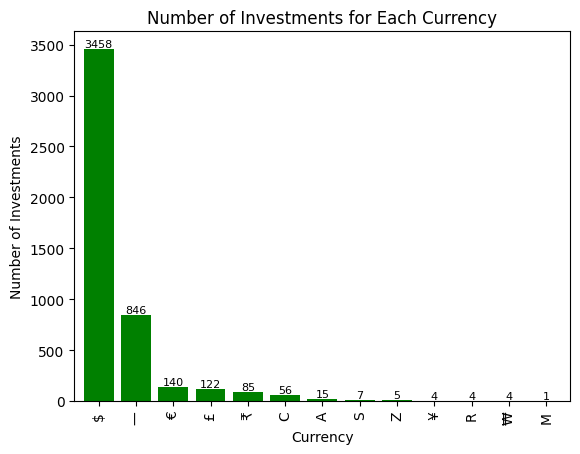

In [ ]:
# Displaying the currencies distribution within our data set
currency_counts = Investment["CURRENCY_USED"].value_counts()

# Plotting the bar chart with custom colors and width
ax = currency_counts.plot(kind='bar', color='green', width=0.8)

# Adding labels and title
plt.xlabel('Currency')
plt.ylabel('Number of Investments')
plt.title('Number of Investments for Each Currency')

# Annotating each bar with its count
for i, v in enumerate(currency_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

# Display the plot
plt.show()

In [ ]:
# Creating a dictionary for currency conversion to USD
currencies = {
    '$': 1,
    '€': 1.10,
    '£': 1.27,
    'CN¥': 0.14,
    'CHF': 1.17,
    'CA$': 0.74881,
    'R$': 0.200492,
    '₩': 0.00077,
    'ZAR': 0.054,
    'SEK': 0.099,
    'RUB': 0.011,
    '—': 0,
    'A$': 0.67885993,
    'SGD': 0.75,
    'MYR': 0.22,
    '₹': 0.012,
    '¥': 0.0070,
}

# Function to convert the amount to dollars and format with correct separators
def convert_to_dollars_and_format(row):
    amount = row['MONEY_RAISED']
    if amount[0] in currencies:
        currency_symbol = amount[0]
        if amount[1:].replace(',', '').replace('.', '').isdigit():
            conversion_rate = currencies[currency_symbol]
            amount_in_usd = float(amount[1:].replace(',', '').replace('.', '')) * conversion_rate
            formatted_amount = '${:,.2f}'.format(amount_in_usd).rstrip('0').rstrip('.')
            return formatted_amount
    elif amount.replace(',', '').replace('.', '').isdigit():
        formatted_amount = '${:,.2f}'.format(float(amount)).rstrip('0').rstrip('.')
        return formatted_amount
    return '—'

# Apply the conversion function to create a new column 'MONEY_RAISED_$'
Investment['MONEY_RAISED_$'] = Investment.apply(convert_to_dollars_and_format, axis=1)

# Display the modified DataFrame
Investment

,COMPANY_NAME,FUNDING_TYPE,MONEY_RAISED,ANNOUNCED_DATE,INVESTMENT_STAGE,CURRENCY_USED,MONEY_RAISED_$
0,Pipe,Venture - Series Unknown,"$250,000,000","Mar 31, 2021",—,$,"$250,000,000"
1,Pipe,Series A,"$50,000,000","Mar 9, 2021",Early Stage Venture,$,"$50,000,000"
2,Pipe,Seed,"$6,000,000","Feb 25, 2020",Seed,$,"$6,000,000"
3,Pipe,Seed,"$10,000,000","Jun 24, 2020",Seed,$,"$10,000,000"
4,Epic Games,Seed,"$1,000,000,000","Apr 13, 2021",Seed,$,"$1,000,000,000"
...,...,...,...,...,...,...,...
4742,PTC,Post-IPO Equity,"$1,000,000,000","Jun 11, 2018",—,$,"$1,000,000,000"
4743,Berkshire Hathaway,Post-IPO Equity,"$3,510,000","Aug 15, 2019",—,$,"$3,510,000"
4744,Wipro Technologies,Post-IPO Equity,—,"Oct 1, 2006",—,—,—
4745,Wipro Technologies,Post-IPO Equity,—,"Sep 1, 2007",—,—,—


We now have converted every currencies of our dataframe to '$' in order to analyze these informations in the future.

### Announced Date

In [ ]:
# Change the type of ANNOUNCED_DATE into Datetime
Investment["ANNOUNCED_DATE"] = pd.to_datetime(Investment["ANNOUNCED_DATE"])
Investment["ANNOUNCED_DATE"]

0      2021-03-31
1      2021-03-09
2      2020-02-25
3      2020-06-24
4      2021-04-13
          ...    
4742   2018-06-11
4743   2019-08-15
4744   2006-10-01
4745   2007-09-01
4746   2016-01-21
Name: ANNOUNCED_DATE, Length: 4747, dtype: datetime64[ns]

## Data Exploration / Cleaning - Excel Sheet 'Acquistion'

In [ ]:
Acquisition = pd.read_excel('/content/drive/MyDrive/2324MBD41_Project_Dataset-v01.xlsx', sheet_name = 'ACQUISITION')
Acquisition.describe() # To have a first glance of that sheet

,COMPANY_NAME,ACQUIREE_NAME,ANNOUNCED_DATE,PRICE,ACQUISITION_TYPE
count,5289,5289,5289,5289,5289
unique,497,4167,2691,560,6
top,Microsoft,Fastlane,"May 6, 2021",—,Acquisition
freq,235,4,16,3949,4087


In [ ]:
# Eliminating the duplicates
Acquisition = Acquisition.drop_duplicates()
Acquisition.describe()

,COMPANY_NAME,ACQUIREE_NAME,ANNOUNCED_DATE,PRICE,ACQUISITION_TYPE
count,4196,4196,4196,4196,4196
unique,497,4167,2691,560,6
top,Google,ADT Security,"Dec 23, 2020",—,Acquisition
freq,182,2,9,3128,3241


In [ ]:
# To check the duplicates in a better way, we merge different columns, here 'Company Name' and 'Acquiree Name', to do so we create a new column called 'Overall Info'
Acquisition["OVERALL_INFO"] = Acquisition["COMPANY_NAME"] + " - " + Acquisition["ACQUIREE_NAME"]
description = Acquisition.describe()

print("OVERALL_INFO:")
print(Acquisition["OVERALL_INFO"])
print("\nDescription:")
description

OVERALL_INFO:
0                     IBM - Turbonomic
1                      IBM - myInvenio
2                  IBM - Taos Mountain
3                       IBM - Cloudant
4                         IBM - TruQua
                     ...              
5284          Opendoor - Open Listings
5285    Inscripta - Solana Biosciences
5286                 Glossier - Dynamo
5287             FreightWaves - StakUp
5288                Auth0 - Apility.io
Name: OVERALL_INFO, Length: 4196, dtype: object

Description:


,COMPANY_NAME,ACQUIREE_NAME,ANNOUNCED_DATE,PRICE,ACQUISITION_TYPE,OVERALL_INFO
count,4196,4196,4196,4196,4196,4196
unique,497,4167,2691,560,6,4192
top,Google,ADT Security,"Dec 23, 2020",—,Acquisition,Alibaba Group - Ejoy Technology
freq,182,2,9,3128,3241,2


In [ ]:
# Creating a new dataframe where it shows the remaining duplicated informations that we didn't delete earlier
Acquisition['DUPLICATED?'] = Acquisition.duplicated(subset='OVERALL_INFO', keep=False)
duplicated_df = Acquisition[Acquisition['DUPLICATED?']].reset_index(drop=True)
duplicated_df = duplicated_df.drop(columns=['DUPLICATED?'])
duplicated_df

,COMPANY_NAME,ACQUIREE_NAME,ANNOUNCED_DATE,PRICE,ACQUISITION_TYPE,OVERALL_INFO
0,Cisco,GeoTel Communications,"Apr 13, 1999","$200,000,000",Acquisition,Cisco - GeoTel Communications
1,Cisco,GeoTel Communications,"Apr 13, 1999","$2,000,000,000",Acquisition,Cisco - GeoTel Communications
2,Apollo,Smart & Final,"Feb 20, 2007","$812,900,000",Leveraged Buyout,Apollo - Smart & Final
3,Apollo,Smart & Final,"Apr 16, 2019","$1,100,000,000",Leveraged Buyout,Apollo - Smart & Final
4,Google,BufferBox,"Dec 1, 2012","$17,000,000",Acquisition,Google - BufferBox
5,Google,BufferBox,"Nov 30, 2012",—,—,Google - BufferBox
6,Alibaba Group,Ejoy Technology,"Sep 28, 2017",—,Acquisition,Alibaba Group - Ejoy Technology
7,Alibaba Group,Ejoy Technology,"Sep 27, 2017",—,Acquisition,Alibaba Group - Ejoy Technology


In [ ]:
# Remove the first occurrence of the duplicate: Cisco - GeoTel Communications
duplicated_df = duplicated_df.drop(index=0)

# Update the PRICE for the duplicate: Apollo - Smart & Final
duplicated_df.loc[3, "PRICE"] = "$1,912,900,000"

# Remove the second occurrence of the duplicate: Apollo - Smart & Final
duplicated_df = duplicated_df.drop(index=2)

# Remove the duplicate: Google - BufferBox
duplicated_df = duplicated_df.drop(index=5)

# Remove the duplicate: Alibaba Group - Ejoy Technology
duplicated_df = duplicated_df.drop(index=7)

# Display the resulting DataFrame
duplicated_df.reset_index(drop=True, inplace=True)
duplicated_df

,COMPANY_NAME,ACQUIREE_NAME,ANNOUNCED_DATE,PRICE,ACQUISITION_TYPE,OVERALL_INFO
0,Cisco,GeoTel Communications,"Apr 13, 1999","$2,000,000,000",Acquisition,Cisco - GeoTel Communications
1,Apollo,Smart & Final,"Apr 16, 2019","$1,912,900,000",Leveraged Buyout,Apollo - Smart & Final
2,Google,BufferBox,"Dec 1, 2012","$17,000,000",Acquisition,Google - BufferBox
3,Alibaba Group,Ejoy Technology,"Sep 28, 2017",—,Acquisition,Alibaba Group - Ejoy Technology


We had 4 remaining duplicated informations, by checking online, we were able to see which informations were the most relevant.

In [ ]:
def update_acquisition_dataframe(acquisition_df, new_data_df, key_column):
    # List of keys to drop
    keys_to_drop = new_data_df[key_column].tolist()

    # Drop lines with specified keys
    print("Number of rows before dropping:", len(acquisition_df))
    acquisition_df = acquisition_df[~acquisition_df[key_column].isin(keys_to_drop)]
    print("Number of rows after dropping:", len(acquisition_df))

    # Add new lines to the Acquisition DataFrame
    acquisition_df = pd.concat([acquisition_df, new_data_df], ignore_index=True)
    print("Number of rows after adding new lines:", len(acquisition_df))

    # Drop the specified key column
    acquisition_df = acquisition_df.drop(key_column, axis=1)

    return acquisition_df

# Example usage
key_column_name = "OVERALL_INFO"
Acquisition = update_acquisition_dataframe(Acquisition, duplicated_df, key_column_name)
Acquisition.head()

Number of rows before dropping: 4196
Number of rows after dropping: 4188
Number of rows after adding new lines: 4192


,COMPANY_NAME,ACQUIREE_NAME,ANNOUNCED_DATE,PRICE,ACQUISITION_TYPE,DUPLICATED?
0,IBM,Turbonomic,"Apr 29, 2021","$2,000,000,000",Acquisition,False
1,IBM,myInvenio,"Apr 15, 2021",—,Acquisition,False
2,IBM,Taos Mountain,"Jan 14, 2021",—,Acquisition,False
3,IBM,Cloudant,"Feb 24, 2014",—,Acquisition,False
4,IBM,TruQua,"Nov 16, 2020",—,Acquisition,False


### Announced Date

In [ ]:
# Convert to a proper display of the dates, we had dates with missing informations
Acquisition["ANNOUNCED_DATE"] = pd.to_datetime(Acquisition["ANNOUNCED_DATE"])
Acquisition["ANNOUNCED_DATE"]

0      2021-04-29
1      2021-04-15
2      2021-01-14
3      2014-02-24
4      2020-11-16
          ...    
4187   2020-03-12
4188   1999-04-13
4189   2019-04-16
4190   2012-12-01
4191   2017-09-28
Name: ANNOUNCED_DATE, Length: 4192, dtype: datetime64[ns]

### Price

In [ ]:
# Like in the previous sheet, we want to keep the first element of 'Price' to have an idea of which currencies are used
Acquisition["CURRENCY_USED"] = Acquisition["PRICE"].str[0]
Acquisition["CURRENCY_USED"]

0       $
1       —
2       —
3       —
4       —
       ..
4187    —
4188    $
4189    $
4190    $
4191    —
Name: CURRENCY_USED, Length: 4192, dtype: object

In [ ]:
# Displaying the currencies frequency distribution
Acquisition["CURRENCY_USED"].value_counts()/len(Acquisition)*100

—    74.570611
$    22.018130
€     1.669847
£     0.667939
C     0.620229
R     0.166985
₹     0.143130
A     0.095420
D     0.023855
S     0.023855
Name: CURRENCY_USED, dtype: float64

It appears that we have a lot of missing informations (cf. above frequency with '—' representing 74%) but the second most important currency is the '$'.

Thus we will convert all the other elements to '$'.

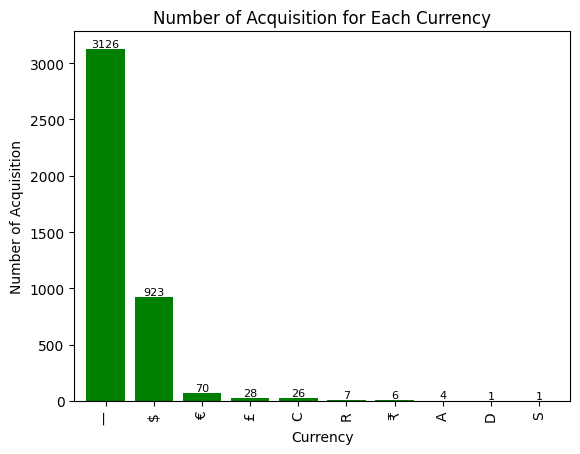

In [ ]:
# Displaying the currencies distribution in a chart
currency_counts = Acquisition["CURRENCY_USED"].value_counts()

# Plotting the bar chart with custom colors and width
ax = currency_counts.plot(kind='bar', color='green', width=0.8)

# Adding labels and title
plt.xlabel('Currency')
plt.ylabel('Number of Acquisition')
plt.title('Number of Acquisition for Each Currency')

# Annotating each bar with its count
for i, v in enumerate(currency_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

# Display the plot
plt.show()

In [ ]:
# Creating a dictionary for currency conversion to USD
currencies = {
    '$': 1,
    '€': 1.10,
    '£': 1.27,
    'CN¥': 0.14,
    'CHF': 1.17,
    'CA$': 0.74881,
    'R$': 0.200492,
    '₩': 0.00077,
    'ZAR': 0.054,
    'SEK': 0.099,
    'RUB': 0.011,
    '—': 0,
    'A$': 0.67885993,
    'SGD': 0.75,
    'MYR': 0.22,
    '₹': 0.012,
    '¥': 0.0070,
}
# Function to convert the amount to dollars and format with correct separators
def convert_to_dollars_and_format(row):
    amount = row['PRICE']
    if amount[0] in currencies:
        currency_symbol = amount[0]
        if amount[1:].replace(',', '').replace('.', '').isdigit():
            conversion_rate = currencies[currency_symbol]
            amount_in_usd = float(amount[1:].replace(',', '').replace('.', '')) * conversion_rate
            formatted_amount = '${:,.2f}'.format(amount_in_usd).rstrip('0').rstrip('.')
            return formatted_amount
    elif amount.replace(',', '').replace('.', '').isdigit():
        formatted_amount = '${:,.2f}'.format(float(amount)).rstrip('0').rstrip('.')
        return formatted_amount
    return '—'

# Apply the conversion function to create a new column 'AMOUNT_ACQUISITION_$'
Acquisition['AMOUNT_ACQUISITION_$'] = Acquisition.apply(convert_to_dollars_and_format, axis=1)

# Display the modified DataFrame
Acquisition

,COMPANY_NAME,ACQUIREE_NAME,ANNOUNCED_DATE,PRICE,ACQUISITION_TYPE,DUPLICATED?,CURRENCY_USED,AMOUNT_ACQUISITION_$
0,IBM,Turbonomic,2021-04-29,"$2,000,000,000",Acquisition,False,$,"$2,000,000,000"
1,IBM,myInvenio,2021-04-15,—,Acquisition,False,—,—
2,IBM,Taos Mountain,2021-01-14,—,Acquisition,False,—,—
3,IBM,Cloudant,2014-02-24,—,Acquisition,False,—,—
4,IBM,TruQua,2020-11-16,—,Acquisition,False,—,—
...,...,...,...,...,...,...,...,...
4187,Auth0,Apility.io,2020-03-12,—,Acquisition,False,—,—
4188,Cisco,GeoTel Communications,1999-04-13,"$2,000,000,000",Acquisition,NaN,$,"$2,000,000,000"
4189,Apollo,Smart & Final,2019-04-16,"$1,912,900,000",Leveraged Buyout,NaN,$,"$1,912,900,000"
4190,Google,BufferBox,2012-12-01,"$17,000,000",Acquisition,NaN,$,"$17,000,000"


Now everything is converted to '$'

In [ ]:
# We now remove the column 'Currency Used' because we don't need it anymore
Acquisition = Acquisition.drop(columns='CURRENCY_USED')
Acquisition

,COMPANY_NAME,ACQUIREE_NAME,ANNOUNCED_DATE,PRICE,ACQUISITION_TYPE,DUPLICATED?,AMOUNT_ACQUISITION_$
0,IBM,Turbonomic,2021-04-29,"$2,000,000,000",Acquisition,False,"$2,000,000,000"
1,IBM,myInvenio,2021-04-15,—,Acquisition,False,—
2,IBM,Taos Mountain,2021-01-14,—,Acquisition,False,—
3,IBM,Cloudant,2014-02-24,—,Acquisition,False,—
4,IBM,TruQua,2020-11-16,—,Acquisition,False,—
...,...,...,...,...,...,...,...
4187,Auth0,Apility.io,2020-03-12,—,Acquisition,False,—
4188,Cisco,GeoTel Communications,1999-04-13,"$2,000,000,000",Acquisition,NaN,"$2,000,000,000"
4189,Apollo,Smart & Final,2019-04-16,"$1,912,900,000",Leveraged Buyout,NaN,"$1,912,900,000"
4190,Google,BufferBox,2012-12-01,"$17,000,000",Acquisition,NaN,"$17,000,000"


## Data Exploration / Cleaning - Excel Sheet 'Employee'

In [ ]:
Employee = pd.read_excel('/content/drive/MyDrive/2324MBD41_Project_Dataset-v01.xlsx', sheet_name = 'EMPLOYEE')
Employee.describe() # To have a first glance of that sheet

,EMPLOYEE_MD5,JOB_TITLES,COMPANY_NAME,ATTENDED_SCHOOLS
count,20702,20702,20702,6584
unique,20702,12308,964,2973
top,aac4a9fe0edc50a77072eae64578a892,Software Engineer,Microsoft,Stanford University
freq,1,510,1756,159


In [ ]:
# Display the count for each 'Schools' that are mentioned in that column, without counting the 'null' informations
Employee["ATTENDED_SCHOOLS"].dropna().value_counts()

 Stanford University                                                                 159
 University of California, Berkeley                                                  106
 Massachusetts Institute of Technology - MIT                                          92
 Carnegie Mellon University                                                           59
 Harvard University                                                                   57
                                                                                    ... 
 Columbia University Wharton School of the University of Pennsylvania                  1
 University College London (UCL) Wharton School of the University of Pennsylvania      1
 IDC Herzliya The Open University                                                      1
 The College of Management Academic Studies                                            1
 EAE Business School                                                                   1
Name: ATTENDED_SCHOOL

In [ ]:
# Checking the frequency of these 'Schools'
Employee["ATTENDED_SCHOOLS"].value_counts()/len(Employee)*100

 Stanford University                                                                 0.768042
 University of California, Berkeley                                                  0.512028
 Massachusetts Institute of Technology - MIT                                         0.444402
 Carnegie Mellon University                                                          0.284997
 Harvard University                                                                  0.275336
                                                                                       ...   
 Columbia University Wharton School of the University of Pennsylvania                0.004830
 University College London (UCL) Wharton School of the University of Pennsylvania    0.004830
 IDC Herzliya The Open University                                                    0.004830
 The College of Management Academic Studies                                          0.004830
 EAE Business School                                        

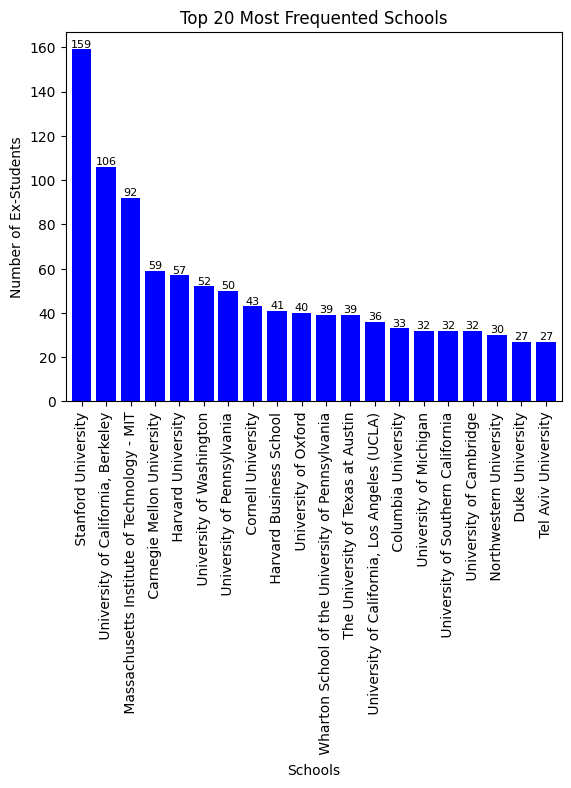

In [ ]:
# Get the top 20 schools
top_schools_counts = Employee["ATTENDED_SCHOOLS"].value_counts().nlargest(20)

# Plotting the bar chart with custom colors and width
ax = top_schools_counts.plot(kind='bar', color='blue', width=0.8)

# Adding labels and title
plt.xlabel('Schools')
plt.ylabel('Number of Ex-Students')
plt.title('Top 20 Most Frequented Schools')

# Annotating each bar with its count
for i, v in enumerate(top_schools_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

# Display the plot
plt.show()

In [ ]:
# Trying to find the % of student that went in the top 25 'Schools'
total_students = len(Employee)
print(f"Total number of students: {total_students}")

# Calculate and display the number of students in the top 25 schools
students_in_top25 = top_schools_counts.sum()
print(f"Number of students in the top 25 schools: {students_in_top25}")

# Calculate and display the percentage of people in the top 25 schools
percentage_top25 = (students_in_top25 / total_students) * 100
print(f"Percentage of people in the top 25 schools: {percentage_top25:.2f}%")

Total number of students: 20702
Number of students in the top 25 schools: 1026
Percentage of people in the top 25 schools: 4.96%


# Project Guide - Questions

## [1] How many companies have received at least one round of investment?

In [ ]:
# Clean and convert 'MONEY_RAISED' to numeric values, excluding '—'
Investment['Money_Raised_Value_Dollar_Currency'] = pd.to_numeric(
    Investment['MONEY_RAISED'].replace('—', pd.NA).str.replace(',', '').str.replace('$', '', regex=True),
    errors='coerce'
)

# Count the number of unique companies before excluding '—' values
num_companies_before = Investment['COMPANY_NAME'].nunique()

# Count the number of unique companies after excluding '—' values
num_companies_after = Investment[Investment['MONEY_RAISED'] != '—']['COMPANY_NAME'].nunique()

# Print the counts
print(f"Number of companies that have received at least one round of investment (including '—' values): {num_companies_before}")
print(f"Number of companies that have received at least one round of investment (excluding '—' values): {num_companies_after}")

Number of companies that have received at least one round of investment (including '—' values): 935
Number of companies that have received at least one round of investment (excluding '—' values): 925


## [2] What are the distributions of the current status of these companies?

### Active / Inactive

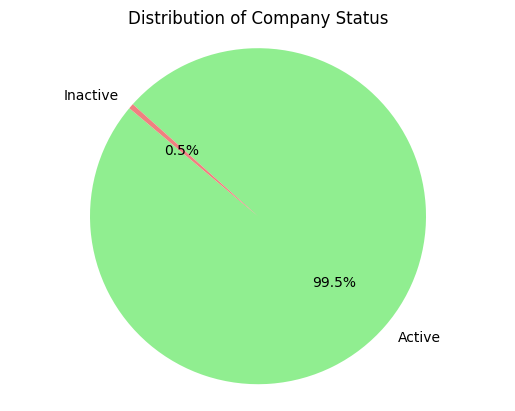

In [ ]:
classification_columns = ['FOUNDED_ON', 'CLOSED_ON']

Company['CLASSIFICATION'] = np.where(
    Company['CLOSED_ON'] != 'NaT',
    'Inactive',
    'Active')

# Display the distribution of the 'CLASSIFICATION' column
classification_distribution = Company['CLASSIFICATION'].value_counts()

colors = ['lightgreen', 'lightcoral']  # Specify colors for 'Active' and 'Inactive'
plt.pie(classification_distribution, labels=classification_distribution.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Company Status')

# Display the plot
plt.show()

In [ ]:
# Get the number of active and inactive companies
active_companies = classification_distribution['Active']
inactive_companies = classification_distribution['Inactive']

# Print the counts
print(f'Number of Active Companies: {active_companies}')
print(f'Number of Inactive Companies: {inactive_companies}')

Number of Active Companies: 995
Number of Inactive Companies: 5


### Founded On

In [ ]:
# Calculate the percentage values
result = sum(Company[Company['FOUNDED_ON'] >= 2005]['FOUNDED_ON']) / sum(Company['FOUNDED_ON'])

# Convert result to percentage
result_percentage = result * 100

print(f'The percentage of companies founded since 2005 is: {result_percentage:.2f}%')

The percentage of companies founded since 2005 is: 82.27%


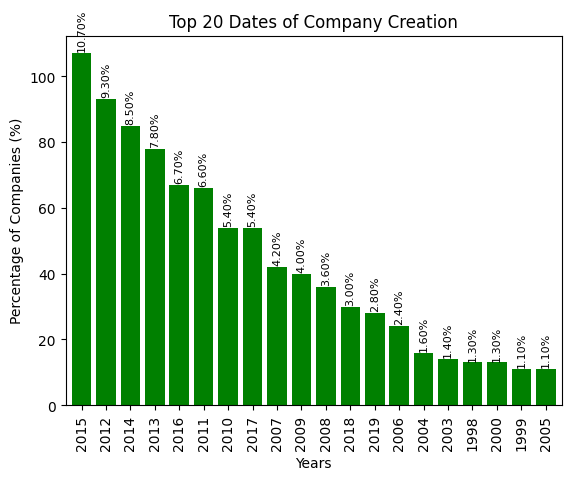

In [ ]:
# Calculate the percentage values
percentage_values = (dates_founded_count / len(Company)) * 100

# Plotting the bar chart with custom width and color
ax = dates_founded_count.plot(kind='bar', width=0.8, color='green')

# Adding labels and title
plt.xlabel('Years')
plt.ylabel('Percentage of Companies (%)')
plt.title('Top 20 Dates of Company Creation')

# Annotating each bar with its percentage
for i, v in enumerate(dates_founded_count):
    percentage = percentage_values.iloc[i]
    ax.text(i, v + 0.5, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=8, rotation='vertical')

plt.show()

### Exited On

In [ ]:
# Convert 'EXITED_ON' to datetime if it's not already
Company['EXITED_ON'] = pd.to_datetime(Company['EXITED_ON'], errors='coerce')

# Calculate the percentage values
result = sum(Company[Company['EXITED_ON'].dt.year >= 2010]['EXITED_ON'].notna()) / len(Company) * 100

print(f'The percentage of companies exited since 2010 is: {result:.2f}%, taking into account all the companies')


The percentage of companies exited since 2010 is: 24.10%, taking into account all the companies


In [ ]:
# Count the total number of companies that have 'EXITED_ON'
total_exited_companies = Company['EXITED_ON'].notna().sum()

# Count the number of companies that have 'EXITED_ON' after 2010
exited_after_2010 = Company[Company['EXITED_ON'].dt.year >= 2010]['EXITED_ON'].notna().sum()

# Calculate the percentage of companies that have 'EXITED_ON' after 2010
percentage_exited_after_2010 = (exited_after_2010 / total_exited_companies) * 100

print(f"Total number of companies that have 'EXITED_ON': {total_exited_companies}")
print(f"Number of companies that have 'EXITED_ON' after 2010: {exited_after_2010}")
print(f"Percentage of companies that have 'EXITED_ON' after 2010: {percentage_exited_after_2010:.2f}%")

Total number of companies that have 'EXITED_ON': 322
Number of companies that have 'EXITED_ON' after 2010: 241
Percentage of companies that have 'EXITED_ON' after 2010: 74.84%


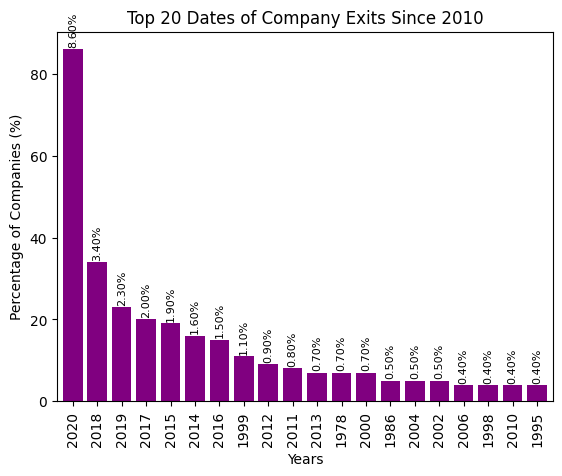

In [ ]:
dates_exited_count = Company['EXITED_ON'].dt.year.astype('Int64').value_counts().head(20)

# Calculate the percentage values
percentage_values = (dates_exited_count / len(Company)) * 100

# Plotting the bar chart with custom width and color
ax = dates_exited_count.plot(kind='bar', width=0.8, color='purple')

# Adding labels and title
plt.xlabel('Years')
plt.ylabel('Percentage of Companies (%)')
plt.title('Top 20 Dates of Company Exits Since 2010')

# Annotating each bar with its percentage
for i, v in enumerate(dates_exited_count):
    percentage = percentage_values.iloc[i]
    ax.text(i, v + 0.5, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=8, rotation='vertical')

plt.show()

In [ ]:
# Display the results in a table using tabulate
results_table = pd.DataFrame({
    'Total Companies with that have exited': [total_exited_companies],
    'Companies with that have exited after 2010': [exited_after_2010],
    'Percentage of exited companies after 2010': [percentage_exited_after_2010]
})

# Print the tabulated table
print(tabulate(results_table, headers='keys', tablefmt='pretty'))

+---+---------------------------------------+--------------------------------------------+-------------------------------------------+
|   | Total Companies with that have exited | Companies with that have exited after 2010 | Percentage of exited companies after 2010 |
+---+---------------------------------------+--------------------------------------------+-------------------------------------------+
| 0 |                 322.0                 |                   241.0                    |             74.84472049689441             |
+---+---------------------------------------+--------------------------------------------+-------------------------------------------+


Among the companies that have exited: 74.84% have exited after 2010.

### Closed On

In [ ]:
closed_companies = Company[Company['CLOSED_ON'] != 'NaT']

# Display the count of closed companies
closed_on_count = len(closed_companies)
print(f"Number of closed companies: {closed_on_count}")

# Display the details of closed companies with 'COMPANY_NAME' as the first index
print("Details of closed companies:")
closed_companies.set_index('COMPANY_NAME')
closed_companies

Number of closed companies: 5
Details of closed companies:


,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER,INDUSTRY_DESC,CITY,REGION,COUNTRY,CLASSIFICATION
184,Omni,"Apps, Marketplace, Mobile","San Francisco, California, United States",2014,NaT,2020,Less than $1M,51-100,Apps,San Francisco,California,United States,Inactive
507,Nokia,"Electronics, Enterprise Software, Infrastructu...","Espoo, Southern Finland, Finland",1865,2004-01-01,2020,$1B to $10B,10001+,Electronics,Espoo,Southern Finland,Finland,Inactive
624,YourStory,"Internet, News, Public Relations, Publishing","Bangalore, Karnataka, India",2008,NaT,2020,Less than $1M,11-50,Internet,Bangalore,Karnataka,India,Inactive
835,Vault,"Financial Services, Lending, Personal Finance","Austin, Texas, United States",2013,NaT,2014,$1M to $10M,11-50,Financial Services,Austin,Texas,United States,Inactive
929,Zume Pizza,"Consumer, Food and Beverage, Food Delivery","Mountain View, California, United States",2015,NaT,2020,$50M to $100M,101-250,Consumer,Mountain View,California,United States,Inactive


In [ ]:
print(f"Number of companies closed in 2020: {closed_2020_count}")
print(f"Number of companies closed in 2014: {closed_2014_count}")

Number of companies closed in 2020: 4
Number of companies closed in 2014: 1


## [3] On average, how much money each company has received at Series A round?

In [ ]:
# Creating a dictionary for currency conversion to USD
currencies = {
    '$': 1,
    '€': 1.10,
    '£': 1.27,
    'CN¥': 0.14,
    'CHF': 1.17,
    'CA$': 0.74881,
    'R$': 0.200492,
    '₩': 0.00077,
    'ZAR': 0.054,
    'SEK': 0.099,
    'RUB': 0.011,
    '—': 0,
    'A$': 0.67885993,
    'SGD': 0.75,
    'MYR': 0.22,
    '₹': 0.012,
    '¥': 0.0070,
}

# Function to convert the amount to dollars and format with correct separators
def convert_to_dollars_and_format(row):
    amount = row['MONEY_RAISED']
    if amount[0] in currencies:
        currency_symbol = amount[0]
        if amount[1:].replace(',', '').replace('.', '').isdigit():
            conversion_rate = currencies[currency_symbol]
            amount_in_usd = float(amount[1:].replace(',', '').replace('.', '')) * conversion_rate
            formatted_amount = '${:,.2f}'.format(amount_in_usd).rstrip('0').rstrip('.')
            return formatted_amount
    elif amount.replace(',', '').replace('.', '').isdigit():
        formatted_amount = '${:,.2f}'.format(float(amount)).rstrip('0').rstrip('.')
        return formatted_amount
    return '—'

# Apply the conversion function to create a new column 'MONEY_RAISED_$'
Investment['MONEY_RAISED_$'] = Investment.apply(convert_to_dollars_and_format, axis=1)

# Display the modified DataFrame
Investment

,COMPANY_NAME,FUNDING_TYPE,MONEY_RAISED,ANNOUNCED_DATE,INVESTMENT_STAGE,CURRENCY_USED,MONEY_RAISED_$,Money_Raised_Value_Dollar_Currency
0,Pipe,Venture - Series Unknown,"$250,000,000",2021-03-31,—,$,"$250,000,000",2.500000e+08
1,Pipe,Series A,"$50,000,000",2021-03-09,Early Stage Venture,$,"$50,000,000",5.000000e+07
2,Pipe,Seed,"$6,000,000",2020-02-25,Seed,$,"$6,000,000",6.000000e+06
3,Pipe,Seed,"$10,000,000",2020-06-24,Seed,$,"$10,000,000",1.000000e+07
4,Epic Games,Seed,"$1,000,000,000",2021-04-13,Seed,$,"$1,000,000,000",1.000000e+09
...,...,...,...,...,...,...,...,...
4742,PTC,Post-IPO Equity,"$1,000,000,000",2018-06-11,—,$,"$1,000,000,000",1.000000e+09
4743,Berkshire Hathaway,Post-IPO Equity,"$3,510,000",2019-08-15,—,$,"$3,510,000",3.510000e+06
4744,Wipro Technologies,Post-IPO Equity,—,2006-10-01,—,—,—,NaN
4745,Wipro Technologies,Post-IPO Equity,—,2007-09-01,—,—,—,NaN


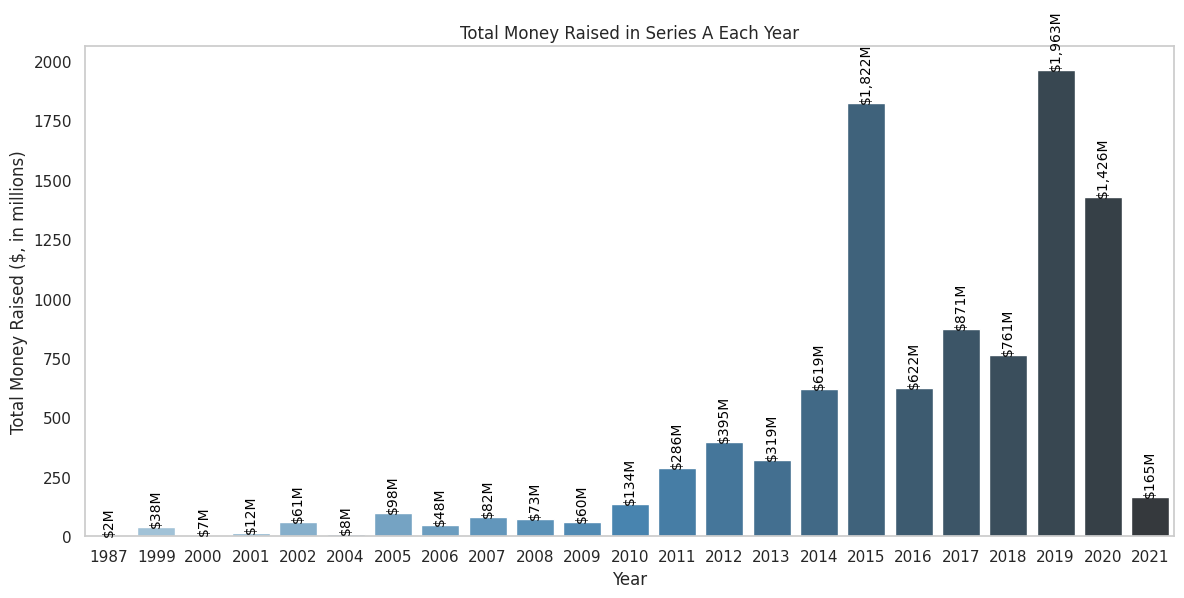

In [ ]:
# Convert 'ANNOUNCED_DATE' to datetime format
Investment['ANNOUNCED_DATE'] = pd.to_datetime(Investment['ANNOUNCED_DATE'])

# Create a new column 'YEAR' extracting the year from 'ANNOUNCED_DATE'
Investment['YEAR'] = Investment['ANNOUNCED_DATE'].dt.year

# Filter data for 'Series A' stage
series_a_data = Investment[Investment['FUNDING_TYPE'] == 'Series A']

# Group by 'YEAR' and calculate the total money raised for each year
grouped_data = series_a_data.groupby('YEAR')['Money_Raised_Value_Dollar_Currency'].sum()

# Filter out years with no data
grouped_data = grouped_data[grouped_data.notnull()]

# Round the values to the nearest million
grouped_data_rounded = (grouped_data / 1e6).round()

# Set a Seaborn style and color palette with different nuances of blue and purple
sns.set(style="whitegrid")
colors = sns.color_palette("Blues_d", len(grouped_data_rounded))

# Display a bar chart with increased width and vertical values using Seaborn
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=grouped_data_rounded.index, y=grouped_data_rounded.values, palette=colors, ax=ax)
plt.title('Total Money Raised in Series A Each Year')
plt.xlabel('Year')
plt.ylabel('Total Money Raised ($, in millions)')
plt.xticks(rotation=0)  # Rotate x-axis labels
plt.grid(False)  # Remove the grid
plt.tight_layout()

# Display the total values vertically on the histogram
for i, value in enumerate(grouped_data_rounded):
    plt.text(i, value, f'${value:,.0f}M', ha='center', va='bottom', fontsize=10, color='black', rotation='vertical')

plt.show()

In [ ]:
# Calculate the overall money raised in Series A
overall_money_raised = series_a_data['Money_Raised_Value_Dollar_Currency'].sum()

# Round the overall money raised to the nearest million
overall_money_raised_rounded = round(overall_money_raised / 1e6)

print(f"Overall Money Raised in Series A: ${overall_money_raised_rounded:,.0f}M")

Overall Money Raised in Series A: $9,872M


In [ ]:
# Calculate the average money raised for all years excluding null values
average_money_raised = series_a_data['Money_Raised_Value_Dollar_Currency'].mean()

# Round the average money raised to the nearest million
average_money_raised_rounded = round(average_money_raised / 1e6)

# Display the rounded average money raised
print(f"Average Money Raised in Series A for each companies(rounded to the nearest million): ${average_money_raised_rounded:,.0f}M")

Average Money Raised in Series A for each companies(rounded to the nearest million): $18M


## [4] Which company has the largest number of acquisitions?

In [ ]:
# We create a dataframe Acquisition_Company_count wich represents the number of acquisition for each company
Acquisition_Company_count = Acquisition.groupby('COMPANY_NAME')[['ACQUIREE_NAME']].count().sort_values(by='ACQUIREE_NAME', ascending=False)
Acquisition_Company_count

,ACQUIREE_NAME
COMPANY_NAME,
Google,181
Cisco,180
Microsoft,174
Accenture,159
EQT,139
...,...
PhonePe,1
Exclaimer,1
Exabeam,1


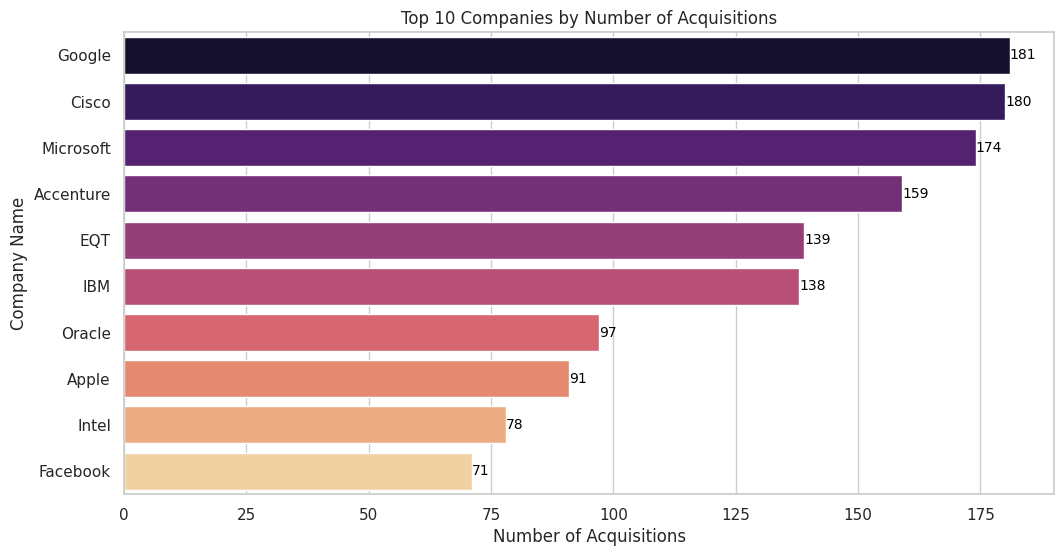

In [ ]:
# Set Seaborn style and choose a more vivid color palette
sns.set(style="whitegrid")
vivid_palette = sns.color_palette("magma", n_colors=10)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot a horizontal bar chart of the count of acquisitions with the chosen vivid palette
barplot = sns.barplot(data=Acquisition_Company_count.head(10), x='ACQUIREE_NAME', y=Acquisition_Company_count.head(10).index, palette=vivid_palette, ax=ax)

# Set labels and title
plt.xlabel('Number of Acquisitions')
plt.ylabel('Company Name')
plt.title('Top 10 Companies by Number of Acquisitions')

# Add values to the bars
for p in barplot.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.0f}', ha='left', va='center', fontsize=10, color='black')

# Show the plot
plt.show()

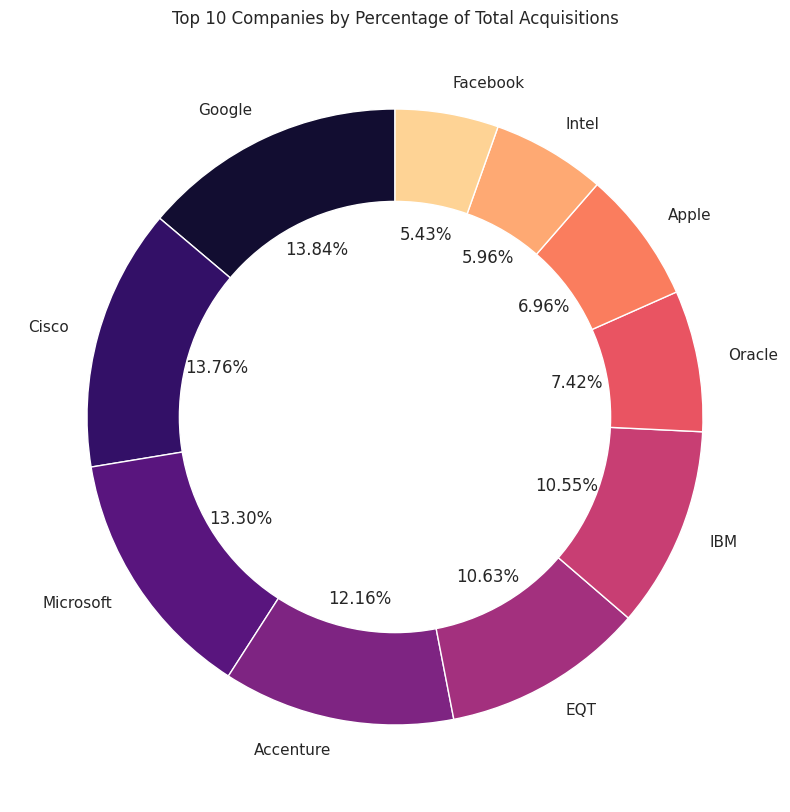

In [ ]:
# Calculate the percentage of total acquisitions for each company
total_acquisitions = Acquisition_Company_count['ACQUIREE_NAME'].sum()
Acquisition_Company_count['Percentage'] = (Acquisition_Company_count['ACQUIREE_NAME'] / total_acquisitions) * 100

# Set Seaborn style and choose a darker color palette
sns.set(style="whitegrid")
dark_palette = sns.color_palette("magma", n_colors=10)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot a pie chart of the percentage of total acquisitions
pie_chart = plt.pie(
    Acquisition_Company_count['Percentage'].head(10),
    labels=Acquisition_Company_count.head(10).index,
    autopct='%1.2f%%',  # Display two numbers after the decimal point
    startangle=90,
    colors=dark_palette,
)

# Draw a white circle in the middle to display the percentage
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set title
plt.title('Top 10 Companies by Percentage of Total Acquisitions')

# Show the plot
plt.show()

In [ ]:
# Identify the company with the highest number of acquisitions
max_acquisition_company = Acquisition_Company_count['Percentage'].idxmax()

# Print the company with the highest number of acquisitions
print(f"Company with the Highest Number of Acquisitions: {max_acquisition_company}")

Company with the Highest Number of Acquisitions: Google


## [5] Which of these companies have CEOs graduated from a top school?

In [ ]:
Employee

,EMPLOYEE_MD5,JOB_TITLES,COMPANY_NAME,ATTENDED_SCHOOLS
0,aac4a9fe0edc50a77072eae64578a892,CEO,Twitter,NaN
1,f9c87bcba2ffe2237e039b2e2c86b16f,Co-Founder,Twitter,Northeastern University University of Massach...
2,36830ffebad9a630da8a7a03a45f2730,Team Member,Twitter,NaN
3,84a91ad0f9b4149759f47fdc949fed42,General Counsel,Twitter,Cornell University New York University School...
4,7881769fc62f54c36a687bda02b66198,"VP, Trust & Safety",Twitter,NaN
...,...,...,...,...
20697,72c32150cb3f9b6e806fa530ed610175,Chairman and CEO,Iberdrola,NaN
20698,dd0ae519effadbef7559d299ad355f1f,Digital Channels Specialist Web Analyst,Iberdrola,EAE Business School
20699,aae97cfe2ea38ca0609a341e984b6b57,CEO,JD Logistics,NaN
20700,b8a8c88bce6444121ebce4ef8d41a204,Data Scientist,Keywords Studios,NaN


In [ ]:
ceo_view = Employee[Employee['JOB_TITLES'].str.contains('CEO', case=False, na=False)]
ceo_view

,EMPLOYEE_MD5,JOB_TITLES,COMPANY_NAME,ATTENDED_SCHOOLS
0,aac4a9fe0edc50a77072eae64578a892,CEO,Twitter,NaN
107,1695d67dedf7d6913b77025f96b43957,CEO,Google,Indian Institute of Technology Kharagpur Stan...
491,f7034d0eed81c81a2ca1b9ef1c2f471b,"CEO, Google Cloud",Google,Princeton University Stanford Graduate School...
1704,a31eaa3832e6bba75a416e7acb949678,Co-Founder & CEO,Airbnb,Rhode Island School of Design
1844,ebcbd9c696d452830124969a587792a8,CEO and Founder,Twitch,NaN
...,...,...,...,...
20668,d4281b44c8bbc13f8bbb957a60a44a73,CEO,Animoca Brands,NaN
20686,dbbb2f8af8709bef5d8c5e367cf11752,CEO,HMD,NaN
20697,72c32150cb3f9b6e806fa530ed610175,Chairman and CEO,Iberdrola,NaN
20699,aae97cfe2ea38ca0609a341e984b6b57,CEO,JD Logistics,NaN


In [ ]:
# Count the frequency of schools in the 'ATTENDED_SCHOOLS' column for CEOs
ceo_school_counts = ceo_view["ATTENDED_SCHOOLS"].value_counts()

# Get the top 10 schools by frequency of appearance
top_ceo_schools = ceo_school_counts.nlargest(10)

# Print or further analyze the top CEO schools
print("Top CEO Schools:")
print(top_ceo_schools)

Top CEO Schools:
 Stanford University                            14
 Harvard University                              6
 Columbia University                             5
 Massachusetts Institute of Technology - MIT     4
 University of Pennsylvania                      4
 Brown University                                4
 Carnegie Mellon University                      4
 University of Maryland                          4
 University of Washington                        3
 University of California, Berkeley              3
Name: ATTENDED_SCHOOLS, dtype: int64


In [ ]:
# Filter ceo_view to include only CEOs from the top schools
ceos_from_top_schools = ceo_view[ceo_view["ATTENDED_SCHOOLS"].isin(top_ceo_schools.index)]

# Exclude 'EMPLOYEE_MD5' column
ceos_from_top_schools = ceos_from_top_schools.drop(columns=['EMPLOYEE_MD5'])

# Sort the DataFrame by 'ATTENDED_SCHOOLS' in alphabetical order
ceos_from_top_schools = ceos_from_top_schools.sort_values(by='ATTENDED_SCHOOLS')

# Set 'JOB_TITLES' as the index
ceos_from_top_schools.set_index('JOB_TITLES', inplace=True)

# Print or further analyze the new table
print("CEOs from Top Schools:")
ceos_from_top_schools

CEOs from Top Schools:


,COMPANY_NAME,ATTENDED_SCHOOLS
JOB_TITLES,,
Co-Founder and CEO,Chooch AI,Brown University
Co-Founder & CEO,Lyra Health,Brown University
CEO,Uber,Brown University
Co-founder & CEO,Figma,Brown University
Co-Founder and CEO,BigBasket,Carnegie Mellon University
Co-Founder & CEO,LendingHome,Carnegie Mellon University
Founder & CEO,Boom Supersonic,Carnegie Mellon University
Co - Founder & CEO,Iterable,Carnegie Mellon University
CEO Groupon Israel,Groupon,Columbia University


In [ ]:
# Create a bar chart showing the count of CEOs from top schools
fig = px.bar(
    ceos_from_top_schools,
    x="ATTENDED_SCHOOLS",  # Assuming "ATTENDED_SCHOOLS" is the column containing school names
    title="CEOs from Top Schools",
    labels={"ATTENDED_SCHOOLS": "Top Schools", "count": "Number of CEOs"},
)

# Customize the layout if needed
fig.update_layout(bargap=0.2)

# Change the x-axis label orientation to 10 degrees
fig.update_xaxes(tickangle=10)

# Show the plot
fig.show()

Stanford is the School where most of the CEOs comes from.

Important to keep in mind that many schools are missing in the dataset, it might not be true that Stanford is the most important school if the dataset was complete.

# New Questions Explored

## [6] How are the companies dispatched in the world? Which Country has the highest number of Companies ?

In [ ]:
# Group by 'COUNTRY' and count the number of occurrences of each 'COMPANY_NAME'
country_counts = Company.groupby("COUNTRY")["COMPANY_NAME"].count()

fig = px.choropleth(
    country_counts.reset_index(),
    locations="COUNTRY",
    locationmode="country names",
    color="COMPANY_NAME",
    hover_name="COUNTRY",
    title="Number of Companies by Country",
    color_continuous_scale="delta",
    range_color=[0,80],
)

# Update the layout to use an orthographic projection for a globe-like appearance
fig.update_layout(geo=dict(projection_type='orthographic'))

# Show the plot
fig.show()

In [ ]:
# Find the country with the highest number of companies
most_companies_country = country_counts.idxmax()
most_companies_count = country_counts.max()

# Print the country with the highest number of companies
print(f"Country with the Highest Number of Companies is: {most_companies_country} ({most_companies_count} companies)")

Country with the Highest Number of Companies is: United States (660 companies)


## [7] How the companies are dispatched in the US? Which State has the highest number of Company?

In [ ]:
# Define a dictionary to map state abbreviations to full state names
state_mapping = {
    'California': 'CA',
    'New York': 'NY',
    'Massachusetts': 'MA',
    'Washington': 'WA',
    'Illinois': 'IL',
    'Texas': 'TX',
    'Georgia': 'GA',
    'Colorado': 'CO',
    'Florida': 'FL',
    'North Carolina': 'NC',
    'District of Columbia': 'DC',
    'Utah': 'UT',
    'New Jersey': 'NJ',
    'Maryland': 'MD',
    'Pennsylvania': 'PA',
    'Connecticut': 'CT',
    'Virginia': 'VA',
    'Ohio': 'OH',
    'Arizona': 'AZ',
    'Wisconsin': 'WI',
    'Tennessee': 'TN',
    'Oregon': 'OR',
    'Minnesota': 'MN',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Nebraska': 'NE',
    'Rhode Island': 'RI',
    'New Mexico': 'NM',
    'South Carolina': 'SC',
    'Arkansas': 'AR',
    'Michigan': 'MI',
    'Louisiana': 'LA',
}

# Filter data for companies in the United States
us_companies = Company[Company['COUNTRY'] == 'United States']

# Map state names to state codes using the dictionary
us_companies['STATE_CODE'] = us_companies['REGION'].map(state_mapping)

# Group by state code and count the number of companies in each state
state_counts = us_companies['STATE_CODE'].value_counts().reset_index()
state_counts.columns = ['STATE', 'COMPANY_COUNT']

# Create a new DataFrame
state_counts_df = pd.DataFrame(state_counts)

# Find the state with the highest number of companies
max_state = state_counts_df.loc[state_counts_df['COMPANY_COUNT'].idxmax(), 'STATE']

# Display the new DataFrame
print(state_counts_df)

# Create a bar chart
fig_bar = px.bar(state_counts,
                 x='STATE',
                 y='COMPANY_COUNT',
                 text='COMPANY_COUNT',  # Display the values on the bars
                 title='Number of Companies in Each State in the United States')

# Add text annotation for the state with the highest number of companies
fig_bar.add_annotation(x=max_state, y=state_counts_df['COMPANY_COUNT'].max(),
                       text=f'Highest: {max_state}', showarrow=True, arrowhead=4, ax=0, ay=-40)

# Create a choropleth map
fig_map = px.choropleth(state_counts,
                        locations='STATE',
                        locationmode="USA-states",
                        color='COMPANY_COUNT',
                        color_continuous_scale="delta",
                        scope="usa",
                        range_color=[0, 140],
                        title='Number of Companies in Each State in the United States')

# Add text annotation for the state with the highest number of companies
fig_map.add_annotation(x=max_state, y=state_counts_df['COMPANY_COUNT'].max(),
                       text=f'Highest: {max_state}', showarrow=True, arrowhead=4, ax=0, ay=-40)

# Show the bar chart
fig_bar.show()

# Show the choropleth map
fig_map.show()

   STATE  COMPANY_COUNT
0     CA            347
1     NY            129
2     MA             40
3     WA             22
4     IL             14
5     TX             12
6     GA             11
7     CO             10
8     FL              8
9     NC              7
10    DC              6
11    UT              6
12    NJ              6
13    MD              5
14    PA              5
15    CT              4
16    VA              4
17    OH              3
18    AZ              3
19    WI              3
20    TN              2
21    OR              2
22    MN              2
23    KS              1
24    KY              1
25    NE              1
26    RI              1
27    NM              1
28    SC              1
29    AR              1
30    MI              1
31    LA              1


<ipython-input-95-1305b9c0b68a>:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## [8] Which funding type has raised the most money in total?

In [ ]:
# Group by 'FUNDING_TYPE' and sum the 'Money_Raised_Value_Dollar_Currency'
funding_type_sum = Investment.groupby('FUNDING_TYPE', as_index=False)['Money_Raised_Value_Dollar_Currency'].sum()

# Convert 'Money_Raised_Value_Dollar_Currency' to billions and format as currency for labels
funding_type_sum['MONEY_RAISED_LABEL'] = (funding_type_sum['Money_Raised_Value_Dollar_Currency'] / 1e9).map('${:,.2f}B'.format)

# Create a bar chart
fig = px.bar(funding_type_sum,
             x='FUNDING_TYPE',
             y='Money_Raised_Value_Dollar_Currency',  # Update y-axis to use the new column
             title='Total Money Raised by Funding Type',
             text='MONEY_RAISED_LABEL',  # Display values on bars
             color='Money_Raised_Value_Dollar_Currency',
             color_continuous_scale='sunset',
             )

# Adjust the layout
fig.update_layout(
    xaxis_title='Funding Type',
    yaxis_title='Total Money Raised ($B)',  # Update y-axis title
    xaxis_tickangle=-45,  # Rotate x-axis labels
    bargap=0.2,  # Adjust gap between bars
)

# Show the plot
fig.show()

In [ ]:
def highest_money_raised_funding_type(data):
    # Group by 'FUNDING_TYPE' and sum the 'Money_Raised_Value_Dollar_Currency'
    funding_type_sum = data.groupby('FUNDING_TYPE', as_index=False)['Money_Raised_Value_Dollar_Currency'].sum()

    # Find the row with the maximum money raised
    max_row = funding_type_sum.loc[funding_type_sum['Money_Raised_Value_Dollar_Currency'].idxmax()]

    # Extract funding type and amount
    max_money_raised_funding_type = max_row['FUNDING_TYPE']
    max_money_raised_amount = max_row['Money_Raised_Value_Dollar_Currency'] / 1e9  # Convert to billions

    # Format the amount in billions
    formatted_amount = f"${max_money_raised_amount:.2f}B" if max_money_raised_amount % 1 else f"${int(max_money_raised_amount):,}B"

    return max_money_raised_funding_type, formatted_amount

# Find the funding type with the highest money raised and the corresponding amount
max_money_raised_funding_type, max_money_raised_amount = highest_money_raised_funding_type(Investment)

# Print the results
print(f"The funding type with the highest money raised is: {max_money_raised_funding_type}")
print(f"The amount raised for this funding type is: {max_money_raised_amount}")

The funding type with the highest money raised is: Post-IPO Equity
The amount raised for this funding type is: $61.92B


In [ ]:
def top_n_money_raised_funding_types(data, n=10):
    # Group by 'FUNDING_TYPE' and sum the 'Money_Raised_Value_Dollar_Currency'
    funding_type_sum = data.groupby('FUNDING_TYPE', as_index=False)['Money_Raised_Value_Dollar_Currency'].sum()

    # Sort the funding types by the money raised in descending order
    sorted_funding_types = funding_type_sum.sort_values(by='Money_Raised_Value_Dollar_Currency', ascending=False)

    # Convert 'Money_Raised_Value_Dollar_Currency' to billions and format as currency
    sorted_funding_types['Money_Raised_Billions'] = (sorted_funding_types['Money_Raised_Value_Dollar_Currency'] / 1e9)
    sorted_funding_types['Money_Raised_Billions'] = sorted_funding_types['Money_Raised_Billions'].apply(lambda x: f"${x:.2f}B" if x % 1 else f"${int(x):,}B")

    # Select the top n funding types
    top_n_funding_types = sorted_funding_types.head(n)

    return top_n_funding_types

# Find the top 10 funding types with the highest money raised
top_funding_types = top_n_money_raised_funding_types(Investment, n=10)

# Print the results
print("Top 10 funding types with the highest money raised:")
display(top_funding_types[['FUNDING_TYPE', 'Money_Raised_Billions']])

Top 10 funding types with the highest money raised:


,FUNDING_TYPE,Money_Raised_Billions
10,Post-IPO Equity,$61.92B
13,Private Equity,$50.03B
9,Post-IPO Debt,$48.73B
19,Series C,$45.57B
21,Series E,$34.29B
20,Series D,$32.82B
27,Venture - Series Unknown,$28.50B
22,Series F,$28.38B
18,Series B,$23.01B
2,Corporate Round,$20.83B


## [9] Which year the most money has been raised?

In [ ]:
# Filter data for years starting from 2010
filtered_investment = Investment[Investment['YEAR'] >= 2010]

# Group by 'YEAR' and sum the 'Money_Raised_Value_Dollar_Currency' without resetting the index
yearly_sum = filtered_investment.groupby('YEAR', as_index=False)['Money_Raised_Value_Dollar_Currency'].sum()

# Filter out years with sum inferior to 0
yearly_sum = yearly_sum[yearly_sum['Money_Raised_Value_Dollar_Currency'] > 0]

# Convert 'Money_Raised_Value_Dollar_Currency' to billions and format as currency for labels
yearly_sum['MONEY_RAISED_LABEL'] = (yearly_sum['Money_Raised_Value_Dollar_Currency'] / 1e9).apply(lambda x: f"${x:.2f}B" if x % 1 else f"${int(x):,.0f}B")

# Create a bar chart
fig = px.bar(yearly_sum,
             x='YEAR',
             y='Money_Raised_Value_Dollar_Currency',
             title='Total Money Raised by Year (Starting from 2010)',
             text='MONEY_RAISED_LABEL',
             color='Money_Raised_Value_Dollar_Currency',
             color_continuous_scale='delta',
             category_orders={'YEAR': sorted(yearly_sum['YEAR'].unique())},  # Specify the order of categories
             )

# Adjust the layout for better readability
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Money Raised ($B)',
    xaxis_tickangle=-45,
    bargap=0.2,
)

# Show the plot
fig.show()

In [ ]:
def highest_money_raised_year(data):
    # Group by 'YEAR' and sum the 'Money_Raised_Value_Dollar_Currency'
    year_sum = data.groupby('YEAR', as_index=False)['Money_Raised_Value_Dollar_Currency'].sum()

    # Find the row with the maximum money raised
    max_row = year_sum.loc[year_sum['Money_Raised_Value_Dollar_Currency'].idxmax()]

    # Extract year and amount
    max_money_raised_year = max_row['YEAR']
    max_money_raised_amount = max_row['Money_Raised_Value_Dollar_Currency'] / 1e9  # Convert to billions

    return max_money_raised_year, max_money_raised_amount

# Find the year with the highest money raised and the corresponding amount
max_money_raised_year, max_money_raised_amount = highest_money_raised_year(Investment)

# Print the results
print(f"The year with the highest money raised is: {max_money_raised_year}")
print(f"The amount raised for this year is: ${max_money_raised_amount:.2f}B")

The year with the highest money raised is: 2020.0
The amount raised for this year is: $101.64B


In [ ]:
top_10 = Investment.groupby('YEAR', as_index=False)['Money_Raised_Value_Dollar_Currency'].sum()
top_10 = top_10[top_10['Money_Raised_Value_Dollar_Currency'] > 0]  # Filter out years with sum inferior to 0
top_10 = top_10.sort_values(by='Money_Raised_Value_Dollar_Currency', ascending=False).head(10)

# Convert 'Money_Raised_Value_Dollar_Currency' to billions and format as currency for labels
top_10['MONEY_RAISED'] = (top_10['Money_Raised_Value_Dollar_Currency'] / 1e9).apply(lambda x: f"${x:.2f}B" if x % 1 else f"${int(x):,}B")

# Set 'YEAR' as the index
top_10 = top_10.set_index('YEAR')

# Display the top 10 rows in a table
top_10[['MONEY_RAISED']]

,MONEY_RAISED
YEAR,
2020,$101.64B
2018,$65.75B
2017,$54.56B
2019,$49.18B
2021,$47.27B
2014,$46.01B
2016,$32.26B
2015,$27.07B
2013,$8.35B


## [10] Which acquisition type has represented the most money spent in total?

In [ ]:
# Replace commas and dollar signs, then convert 'AMOUNT_ACQUISITION_$' to numeric and create a new column
Acquisition['AMOUNT_ACQUISITION_NUMERIC'] = pd.to_numeric(Acquisition['AMOUNT_ACQUISITION_$'].str.replace('[\$,]', '', regex=True), errors='coerce')

# Replace NaN values with 0 in the new column
Acquisition['AMOUNT_ACQUISITION_NUMERIC'].fillna(0, inplace=True)

# Group by 'ACQUISITION_TYPE' and sum the 'AMOUNT_ACQUISITION_NUMERIC'
acquisition_type_sum = Acquisition.groupby('ACQUISITION_TYPE', as_index=False)['AMOUNT_ACQUISITION_NUMERIC'].sum()

# Convert 'AMOUNT_ACQUISITION_NUMERIC' to billions and format as currency for labels
acquisition_type_sum['AMOUNT_ACQUISITION_LABEL'] = (acquisition_type_sum['AMOUNT_ACQUISITION_NUMERIC'] / 1e9).map('${:,.2f}B'.format)

# Create a bar chart
fig = px.bar(acquisition_type_sum,
             x='ACQUISITION_TYPE',
             y='AMOUNT_ACQUISITION_NUMERIC',
             title='Total Amount Spent by Acquisition Type',
             text='AMOUNT_ACQUISITION_LABEL',  # Display values on bars
             color='AMOUNT_ACQUISITION_NUMERIC',
             color_continuous_scale='delta',
             )

# Adjust the layout
fig.update_layout(
    xaxis_title='Acquisition Type',
    yaxis_title='Total Amount Spent ($B)',  # Update y-axis title
    xaxis_tickangle=-45,  # Rotate x-axis labels
    bargap=0.2,  # Adjust gap between bars
)

# Add labels on the bars
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Show the plot
fig.show()


In [ ]:
def highest_amount_spent_acquisition_type(data):
    # Group by 'ACQUISITION_TYPE' and sum the 'AMOUNT_ACQUISITION_NUMERIC'
    acquisition_type_sum = data.groupby('ACQUISITION_TYPE', as_index=False)['AMOUNT_ACQUISITION_NUMERIC'].sum()

    # Find the row with the maximum amount spent
    max_row = acquisition_type_sum.loc[acquisition_type_sum['AMOUNT_ACQUISITION_NUMERIC'].idxmax()]

    # Extract acquisition type and amount
    max_amount_spent_acquisition_type = max_row['ACQUISITION_TYPE']
    max_amount_spent = max_row['AMOUNT_ACQUISITION_NUMERIC'] / 1e9  # Convert to billions

    # Format the amount in billions
    formatted_amount = f"${max_amount_spent:.2f}B" if max_amount_spent % 1 else f"${int(max_amount_spent):,}B"

    return max_amount_spent_acquisition_type, formatted_amount

# Find the acquisition type with the highest amount spent and the corresponding amount
max_amount_spent_acquisition_type, max_amount_spent = highest_amount_spent_acquisition_type(Acquisition)

# Print the results
print(f"The acquisition type with the highest amount spent is: {max_amount_spent_acquisition_type}")
print(f"The amount spent for this acquisition type is: {max_amount_spent}")

The acquisition type with the highest amount spent is: Acquisition
The amount spent for this acquisition type is: $1329.07B


## [11] Which Company has made the most number of acquisitions?

In [ ]:
# Filter for 'Acquisition' in the 'ACQUISITION_TYPE' column and exclude null values
Acquisition_acquisitions = Acquisition[Acquisition['ACQUISITION_TYPE'].notnull() & (Acquisition['ACQUISITION_TYPE'] == 'Acquisition')]

# Group by 'COMPANY_NAME' and count the number of acquisitions
company_acquisition_count = Acquisition_acquisitions.groupby('COMPANY_NAME', as_index=False)['ACQUIREE_NAME'].count()

# Rename the count column
company_acquisition_count.rename(columns={'ACQUIREE_NAME': 'ACQUISITION_COUNT'}, inplace=True)

# Take the top 10 companies based on the number of acquisitions
top_10_companies_count = company_acquisition_count.nlargest(10, 'ACQUISITION_COUNT')

# Create a bar chart
fig = px.bar(top_10_companies_count,
              x='COMPANY_NAME',
              y='ACQUISITION_COUNT',  # Use the count column
              title='Top 10 Companies by Number of Acquisitions (Acquisition Type: Acquisition)',
              text='ACQUISITION_COUNT',  # Display values on bars
              color='ACQUISITION_COUNT',
              color_continuous_scale='delta',
              )

# Adjust the layout
fig.update_layout(
    xaxis_title='Company Name',
    yaxis_title='Number of Acquisitions',
    xaxis_tickangle=-45,  # Rotate x-axis labels
    bargap=0.2,  # Adjust gap between bars
)

# Add labels on the bars
fig.update_traces(texttemplate='%{text}', textposition='inside')

# Show the plot
fig.show()

print(f"The company with the highest number of acquisitions is Accenture with 157 companies acquired")

The company with the highest number of acquisitions is Accenture with 157 companies acquired


## [12] Which companies have spent the most money in Company Acquisitions?

In [ ]:
  # Group by 'COMPANY_NAME' and sum the 'AMOUNT_ACQUISITION_NUMERIC'
  company_acquisition_sum = Acquisition.groupby('COMPANY_NAME', as_index=False)['AMOUNT_ACQUISITION_NUMERIC'].sum()

  # Convert 'AMOUNT_ACQUISITION_NUMERIC' to billions and format as currency for labels
  company_acquisition_sum['AMOUNT_ACQUISITION_LABEL'] = (company_acquisition_sum['AMOUNT_ACQUISITION_NUMERIC'] / 1e9).map('${:,.2f}B'.format)

  # Take the top 10 companies based on the total amount spent
  top_10_companies = company_acquisition_sum.nlargest(10, 'AMOUNT_ACQUISITION_NUMERIC')

  # Create a bar chart
  fig = px.bar(top_10_companies,
              x='COMPANY_NAME',
              y='AMOUNT_ACQUISITION_NUMERIC',  # Use the new numeric column
              title='Top 10 Companies by Total Amount Spent on Acquisitions',
              text='AMOUNT_ACQUISITION_LABEL',  # Display values on bars
              color='AMOUNT_ACQUISITION_NUMERIC',
              color_continuous_scale='delta',
              )

  # Adjust the layout
  fig.update_layout(
      xaxis_title='Company Name',
      yaxis_title='Total Amount Spent ($B)',  # Update y-axis title
      xaxis_tickangle=-25,  # Rotate x-axis labels
      bargap=0.2,  # Adjust gap between bars
  )

  # Add labels on the bars
  fig.update_traces(texttemplate='%{text}', textposition='inside')

  # Show the plot
  fig.show()

In [ ]:
# Find the row with the maximum amount spent
max_row = company_acquisition_sum.loc[company_acquisition_sum['AMOUNT_ACQUISITION_NUMERIC'].idxmax()]

# Extract company name and amount spent
max_amount_spent_company = max_row['COMPANY_NAME']
max_amount_spent = max_row['AMOUNT_ACQUISITION_NUMERIC'] / 1e9  # Convert to billions

# Format the amount in billions
formatted_amount = f"${max_amount_spent:.2f}B" if max_amount_spent % 1 else f"${int(max_amount_spent):,}B"

# Print the results
print(f"The company that has bought the most companies is: {max_amount_spent_company}")
print(f"The amount spent by this company on acquisitions is: {formatted_amount}")

The company that has bought the most companies is: Pfizer
The amount spent by this company on acquisitions is: $205.25B


In [ ]:
# Create a tree plot using 'AMOUNT_ACQUISITION_LABEL'
fig = go.Figure(go.Treemap(
    labels=company_acquisition_sum['COMPANY_NAME'],
    parents=[''] * len(company_acquisition_sum['COMPANY_NAME']),
    values=company_acquisition_sum['AMOUNT_ACQUISITION_NUMERIC'] / 1e9,  # Convert to billions
    textinfo="label+value",
    marker=dict(colorscale='delta',)
))

# Update layout for better readability
fig.update_layout(
    title='Total Amount Spent by Company on Acquisitions (in $B)',
    margin=dict(l=0, r=0, b=0, t=40),
)

# Show the plot
fig.show()

Conclusion on Question 11 & 12:

The data is maybe no the most relevant since we have many missing values for the amounts. For exemple Accenture has made the highest number of acquisitions (by removing the duplicates in the count) but they are only showing an amount spent of $0.52B which is low compared to the number of acquisitions made. They are not even in the top 10.

Thus the top companies displayed are maybe not so relevant at the moment. We would need to find the missing values for each companies in order to have a dashboard that makes sense and is close to reality.

## [13] Which year represent the most money that has been spent for the Acquisition type 'Acquisition'?

In [ ]:
Acquisition['ANNOUNCED_DATE'] = Acquisition['ANNOUNCED_DATE'].astype(str)

# Extract the first four characters from 'ANNOUNCED_DATE' to create a new 'YEAR' column
Acquisition['YEAR'] = Acquisition['ANNOUNCED_DATE'].str[:4]

# Replace NaN values with 0 in the new column
Acquisition['AMOUNT_ACQUISITION_NUMERIC'].fillna(0, inplace=True)

# Group by 'YEAR' and 'ACQUISITION_TYPE' and sum the 'AMOUNT_ACQUISITION_NUMERIC'
year_acquisition_sum = Acquisition.groupby(['YEAR', 'ACQUISITION_TYPE'], as_index=False)['AMOUNT_ACQUISITION_NUMERIC'].sum()

# Filter for 'Acquisition' in the 'ACQUISITION_TYPE' column
year_acquisition_sum_acquisition = year_acquisition_sum[year_acquisition_sum['ACQUISITION_TYPE'] == 'Acquisition']

# Find the year with the most money spent for the acquisition type 'Acquisition'
max_amount_spent_year = year_acquisition_sum_acquisition.loc[year_acquisition_sum_acquisition['AMOUNT_ACQUISITION_NUMERIC'].idxmax()]['YEAR']
max_amount_spent = year_acquisition_sum_acquisition['AMOUNT_ACQUISITION_NUMERIC'].max() / 1e9  # Convert to billion dollars

# Print the results
print(f"The year with the most money spent for the acquisition type 'Acquisition' is: {max_amount_spent_year}")
print(f"The amount spent for this year is: ${max_amount_spent:,.2f}B")

# Take the top 10 years based on the total amount spent
top_10_years = year_acquisition_sum_acquisition.groupby('YEAR', as_index=False)['AMOUNT_ACQUISITION_NUMERIC'].sum().nlargest(10, 'AMOUNT_ACQUISITION_NUMERIC')

# Convert amounts to billion dollars
top_10_years['AMOUNT_ACQUISITION_NUMERIC_B'] = top_10_years['AMOUNT_ACQUISITION_NUMERIC'] / 1e9

# Create a bar chart
fig = px.bar(top_10_years,
              x='YEAR',
              y='AMOUNT_ACQUISITION_NUMERIC_B',
              title='Top 10 Years by Total Amount Spent on Acquisitions (Acquisition Type: Acquisition)',
              text=top_10_years['AMOUNT_ACQUISITION_NUMERIC_B'].apply(lambda x: f"${x:.2f}B"),  # Format text with '$' and 'B'
              color='AMOUNT_ACQUISITION_NUMERIC_B',
              color_continuous_scale='delta',
              )

# Adjust the layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Amount Spent ($B)',
    xaxis_tickangle=-45,
    bargap=0.2,
)

# Show the plot
fig.show()

The year with the most money spent for the acquisition type 'Acquisition' is: 2015
The amount spent for this year is: $167.47B


We can see that the total amount spent on Acquisitions has largely decreased over the years, it has been divided by 3 in 6 years.